# Introduction to Project - Problem - Dataset

### Housing Market Analysis: Regional Price Variation and Infrastructure Impact

#### Introduction

This project explores machine learning regression techniques applied to housing market analysis to investigate how square footage, location, and infrastructure affect property pricing across the United States. The goal is to discover whether housing pricing follows consistent patterns nationally or varies significantly by region, while gaining hands-on experience with spatial clustering, regression modeling, and exploratory data analysis. By understanding these pricing relationships, we can develop a predictive model that explains housing costs and reveals regional market dynamics.

#### Problem Statement: 

The housing market is one of the largest economic sectors, yet pricing mechanisms are not fully transparent. Key business and analytical questions include: Does square footage command a consistent price-per-square-foot average across the U.S., or does it vary dramatically by region? How significantly do infrastructure quality and population density influence property values in surrounding areas? Can we develop a model that accurately predicts housing prices based on location and physical characteristics? Understanding these relationships enables real estate investors, developers, and policymakers to make informed decisions about property valuation, market entry strategies, and resource allocation.

#### Dataset Details:

US Cities Housing Market Data - Live Dataset

Link: https://www.kaggle.com/datasets/vincentvaseghi/us-cities-housing-market-data/ 

Dataset Overview:
The US Cities Housing Market Data provides comprehensive housing information across multiple U.S. cities and regions, containing thousands of property records with attributes spanning location, physical characteristics, and market pricing. This dataset enables analysis of how geographic factors and infrastructure characteristics influence property values across diverse regional markets.

## Methodology Overview:

### K-Nearest Neighbors (K-NN) for Spatial Clustering:

K-NN will identify geographic zones where properties have similar pricing characteristics. By grouping houses based on proximity and similarity, we can determine whether regional markets form distinct price clusters and understand what makes certain areas command premium prices.

### Linear Regression for Price Prediction:

Linear regression will quantify the relationship between property features (square footage, location indicators, infrastructure metrics) and sale prices, enabling us to build a predictive model and understand which factors most strongly influence housing costs.

### Data Understanding & Visualization


DATA OVERVIEW
Records loaded: 50,000
Columns: 58
Memory usage: 46.83 MB

COLUMN NAMES
1. PERIOD_BEGIN
2. PERIOD_END
3. PERIOD_DURATION
4. REGION_TYPE
5. REGION_TYPE_ID
6. TABLE_ID
7. IS_SEASONALLY_ADJUSTED
8. REGION
9. CITY
10. STATE
11. STATE_CODE
12. PROPERTY_TYPE
13. PROPERTY_TYPE_ID
14. MEDIAN_SALE_PRICE
15. MEDIAN_SALE_PRICE_MOM
16. MEDIAN_SALE_PRICE_YOY
17. MEDIAN_LIST_PRICE
18. MEDIAN_LIST_PRICE_MOM
19. MEDIAN_LIST_PRICE_YOY
20. MEDIAN_PPSF
21. MEDIAN_PPSF_MOM
22. MEDIAN_PPSF_YOY
23. MEDIAN_LIST_PPSF
24. MEDIAN_LIST_PPSF_MOM
25. MEDIAN_LIST_PPSF_YOY
26. HOMES_SOLD
27. HOMES_SOLD_MOM
28. HOMES_SOLD_YOY
29. PENDING_SALES
30. PENDING_SALES_MOM
31. PENDING_SALES_YOY
32. NEW_LISTINGS
33. NEW_LISTINGS_MOM
34. NEW_LISTINGS_YOY
35. INVENTORY
36. INVENTORY_MOM
37. INVENTORY_YOY
38. MONTHS_OF_SUPPLY
39. MONTHS_OF_SUPPLY_MOM
40. MONTHS_OF_SUPPLY_YOY
41. MEDIAN_DOM
42. MEDIAN_DOM_MOM
43. MEDIAN_DOM_YOY
44. AVG_SALE_TO_LIST
45. AVG_SALE_TO_LIST_MOM
46. AVG_SALE_TO_LIST_YOY
47. SOLD_ABOVE_LI

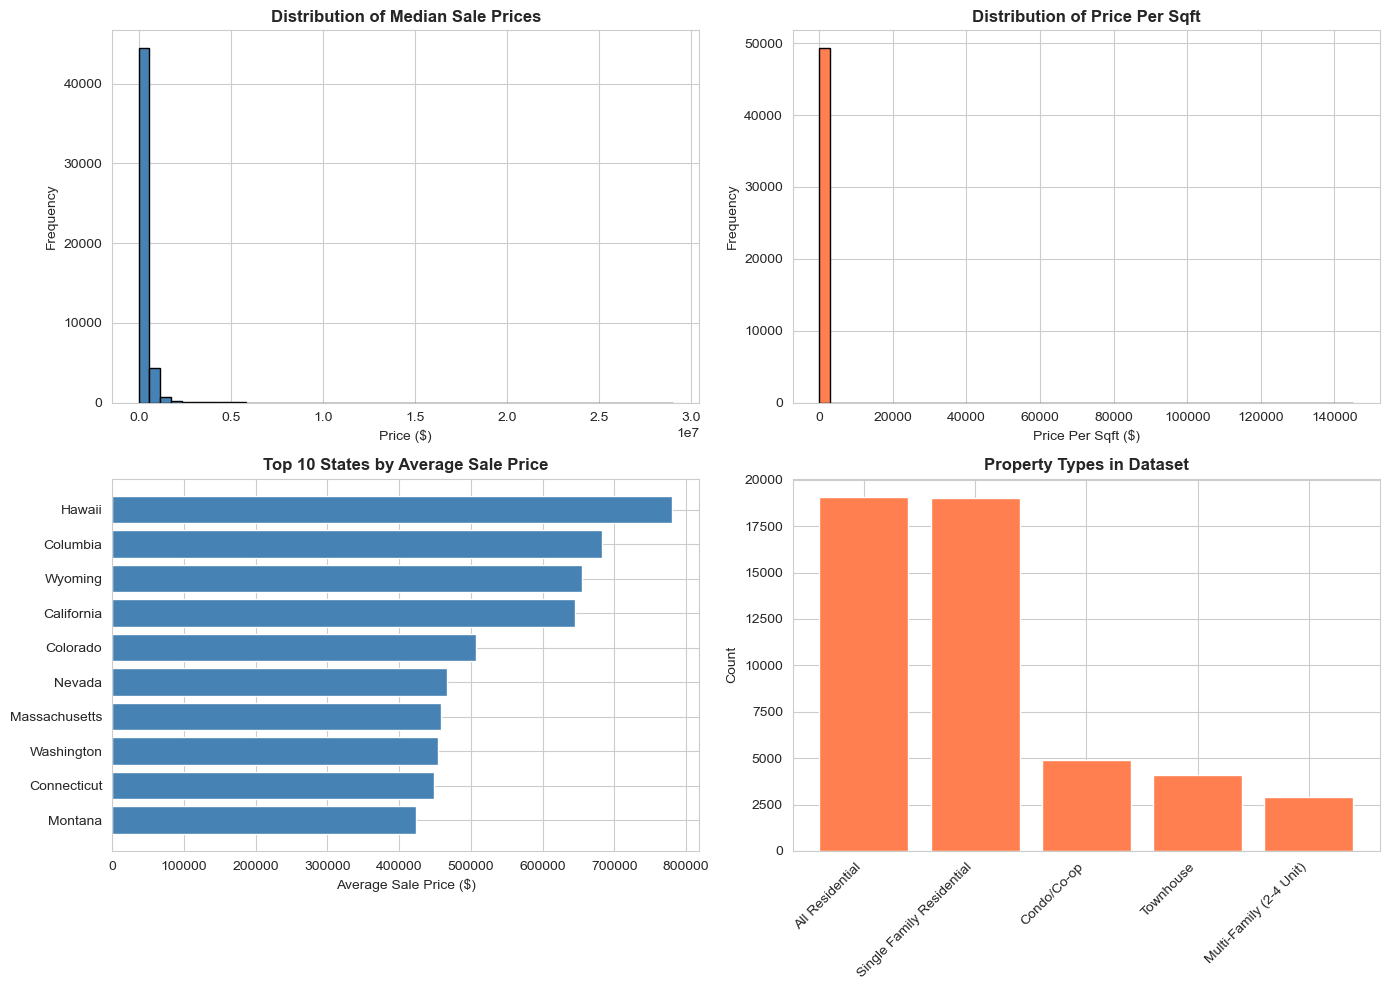

Visualization saved as 'housing_analysis.png'

CORRELATION ANALYSIS

Correlations with MEDIAN_SALE_PRICE:
  MEDIAN_LIST_PRICE: 0.742
  MEDIAN_LIST_PPSF: 0.520
  MEDIAN_PPSF: 0.108
  OFF_MARKET_IN_TWO_WEEKS: 0.107
  AVG_SALE_TO_LIST: 0.094

SUMMARY
Dataset contains 50,000 housing records across 51 states
Price per sqft varies by 612.1% across regions
Both median sale price and price per sqft are available for analysis
Data is ready for spatial clustering and regression modeling


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load sample of data
df = pd.read_csv('city_market_tracker.tsv000', sep='\t', nrows=50000)

print("\nDATA OVERVIEW")
print(f"Records loaded: {len(df):,}")
print(f"Columns: {len(df.columns)}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\nCOLUMN NAMES")
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")

print("\nKEY COLUMNS FOR ANALYSIS")
print(f"Price column: MEDIAN_SALE_PRICE")
print(f"Price per sqft: MEDIAN_PPSF")
print(f"Location columns: CITY, STATE")
print(f"Time period: PERIOD_BEGIN to PERIOD_END")

print("\nMISSING VALUES")
missing_count = df.isnull().sum().sum()
missing_percent = (missing_count / (len(df) * len(df.columns))) * 100
print(f"Total missing values: {missing_count:,} ({missing_percent:.1f}% of all data)")

cols_with_missing = df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)
print(f"Columns with missing data: {len(cols_with_missing)}")
if len(cols_with_missing) > 0:
    print("Top 5 columns with most missing values:")
    for col, count in cols_with_missing.head(5).items():
        pct = (count / len(df)) * 100
        print(f"  {col}: {count:,} ({pct:.1f}%)")

print("\nPRICE STATISTICS")
print(f"Median sale price mean: ${df['MEDIAN_SALE_PRICE'].mean():,.0f}")
print(f"Median sale price range: ${df['MEDIAN_SALE_PRICE'].min():,.0f} - ${df['MEDIAN_SALE_PRICE'].max():,.0f}")

print("\nPRICE PER SQFT STATISTICS")
ppsf_data = df['MEDIAN_PPSF'].dropna()
print(f"Price per sqft mean: ${ppsf_data.mean():,.0f}")
print(f"Price per sqft range: ${ppsf_data.min():,.0f} - ${ppsf_data.max():,.0f}")
ppsf_cv = (ppsf_data.std() / ppsf_data.mean()) * 100
print(f"Coefficient of variation: {ppsf_cv:.1f}%")
print(f"Interpretation: Variation of {ppsf_cv:.1f}% shows regional pricing differences are significant")

print("\nREGIONAL DATA")
print(f"Unique states: {df['STATE'].nunique()}")
print(f"Unique cities: {df['CITY'].nunique()}")

top_states = df['MEDIAN_SALE_PRICE'].groupby(df['STATE']).mean().nlargest(5)
print(f"\nTop 5 states by average sale price:")
for state, price in top_states.items():
    print(f"  {state}: ${price:,.0f}")

print("\nGENERATING VISUALIZATIONS")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

ax1 = axes[0, 0]
price_data = df['MEDIAN_SALE_PRICE'].dropna()
ax1.hist(price_data, bins=50, color='steelblue', edgecolor='black')
ax1.set_title('Distribution of Median Sale Prices', fontweight='bold')
ax1.set_xlabel('Price ($)')
ax1.set_ylabel('Frequency')

ax2 = axes[0, 1]
ppsf_data = df['MEDIAN_PPSF'].dropna()
ax2.hist(ppsf_data, bins=50, color='coral', edgecolor='black')
ax2.set_title('Distribution of Price Per Sqft', fontweight='bold')
ax2.set_xlabel('Price Per Sqft ($)')
ax2.set_ylabel('Frequency')

ax3 = axes[1, 0]
top_10_states = df['MEDIAN_SALE_PRICE'].groupby(df['STATE']).mean().nlargest(10)
ax3.barh(range(len(top_10_states)), top_10_states.values, color='steelblue')
ax3.set_yticks(range(len(top_10_states)))
ax3.set_yticklabels(top_10_states.index)
ax3.set_xlabel('Average Sale Price ($)')
ax3.set_title('Top 10 States by Average Sale Price', fontweight='bold')
ax3.invert_yaxis()

ax4 = axes[1, 1]
property_types = df['PROPERTY_TYPE'].value_counts().head(10)
ax4.bar(range(len(property_types)), property_types.values, color='coral')
ax4.set_xticks(range(len(property_types)))
ax4.set_xticklabels(property_types.index, rotation=45, ha='right')
ax4.set_ylabel('Count')
ax4.set_title('Property Types in Dataset', fontweight='bold')

plt.tight_layout()
plt.savefig('housing_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("Visualization saved as 'housing_analysis.png'")

print("\nCORRELATION ANALYSIS")
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if len(numeric_cols) > 1:
    corr_matrix = df[numeric_cols].corr()
    
    price_cols = ['MEDIAN_SALE_PRICE', 'MEDIAN_PPSF', 'MEDIAN_LIST_PRICE']
    available_price_cols = [col for col in price_cols if col in numeric_cols]
    
    if available_price_cols:
        print(f"\nCorrelations with MEDIAN_SALE_PRICE:")
        if 'MEDIAN_SALE_PRICE' in numeric_cols:
            correlations = corr_matrix['MEDIAN_SALE_PRICE'].sort_values(ascending=False)
            for col, corr in correlations.head(6).items():
                if col != 'MEDIAN_SALE_PRICE':
                    print(f"  {col}: {corr:.3f}")

print("\nSUMMARY")
print(f"Dataset contains {len(df):,} housing records across {df['STATE'].nunique()} states")
print(f"Price per sqft varies by {ppsf_cv:.1f}% across regions")
print(f"Both median sale price and price per sqft are available for analysis")
print(f"Data is ready for spatial clustering and regression modeling")

### Pre-processing

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load sample of data
df = pd.read_csv('city_market_tracker.tsv000', sep='\t', nrows=50000)

print("\nDATA PREPROCESSING\n")

print("STEP 1: INITIAL DATA STATE")
print(f"Records: {len(df):,}")
print(f"Columns: {len(df.columns)}")

print("\nSTEP 2: REMOVE ROWS WITH MISSING CRITICAL COLUMNS")
required_cols = ['MEDIAN_SALE_PRICE', 'MEDIAN_PPSF', 'STATE', 'CITY']
for col in required_cols:
    missing_before = df.isnull().sum()[col]
    df = df.dropna(subset=[col])
    missing_after = df.isnull().sum()[col]
    print(f"  {col}: removed {missing_before - missing_after:,} rows")

print(f"Records after removing nulls: {len(df):,}")

print("\nSTEP 3: REMOVE ZERO AND NEGATIVE PRICES")
zero_prices = len(df[df['MEDIAN_SALE_PRICE'] <= 0])
df = df[df['MEDIAN_SALE_PRICE'] > 0]
print(f"  Removed {zero_prices:,} records with price <= $0")
print(f"  Records remaining: {len(df):,}")

print("\nSTEP 4: REMOVE EXTREME OUTLIERS USING PERCENTILES")
q5_price = df['MEDIAN_SALE_PRICE'].quantile(0.05)
q95_price = df['MEDIAN_SALE_PRICE'].quantile(0.95)
print(f"  Price range for middle 90%: ${q5_price:,.0f} - ${q95_price:,.0f}")

q5_ppsf = df['MEDIAN_PPSF'].quantile(0.05)
q95_ppsf = df['MEDIAN_PPSF'].quantile(0.95)
print(f"  PPSF range for middle 90%: ${q5_ppsf:,.0f} - ${q95_ppsf:,.0f}")

df_filtered = df[(df['MEDIAN_SALE_PRICE'] >= q5_price) & (df['MEDIAN_SALE_PRICE'] <= q95_price)]
df_filtered = df_filtered[(df_filtered['MEDIAN_PPSF'] >= q5_ppsf) & (df_filtered['MEDIAN_PPSF'] <= q95_ppsf)]

removed = len(df) - len(df_filtered)
print(f"  Removed {removed:,} outlier records")
print(f"  Records after filtering: {len(df_filtered):,}")

df = df_filtered.copy()

print("\nSTEP 5: CLEAN DATASET STATISTICS")
print(f"Median sale price: ${df['MEDIAN_SALE_PRICE'].mean():,.0f} average")
print(f"Price range: ${df['MEDIAN_SALE_PRICE'].min():,.0f} - ${df['MEDIAN_SALE_PRICE'].max():,.0f}")
print(f"Price per sqft: ${df['MEDIAN_PPSF'].mean():,.0f} average")
print(f"PPSF range: ${df['MEDIAN_PPSF'].min():,.0f} - ${df['MEDIAN_PPSF'].max():,.0f}")

ppsf_cv = (df['MEDIAN_PPSF'].std() / df['MEDIAN_PPSF'].mean()) * 100
print(f"Price per sqft variation: {ppsf_cv:.1f}%")

print("\nSTEP 6: GEOGRAPHIC COVERAGE")
print(f"Unique states: {df['STATE'].nunique()}")
print(f"Unique cities: {df['CITY'].nunique()}")

print("\nSTEP 7: PROPERTY TYPES")
property_counts = df['PROPERTY_TYPE'].value_counts()
print(f"Property types in dataset: {df['PROPERTY_TYPE'].nunique()}")
for ptype, count in property_counts.head(5).items():
    pct = (count / len(df)) * 100
    print(f"  {ptype}: {count:,} ({pct:.1f}%)")

print("\nSTEP 8: DATA QUALITY CHECK")
print(f"Total records to analyze: {len(df):,}")
print(f"Records removed: {50000 - len(df):,}")
print(f"Retention rate: {(len(df) / 50000) * 100:.1f}%")

print("\nREGIONAL ANALYSIS")
print("\nTop 10 states by average sale price:")
top_price_states = df.groupby('STATE')['MEDIAN_SALE_PRICE'].mean().nlargest(10)
for state, price in top_price_states.items():
    print(f"  {state}: ${price:,.0f}")

print("\nTop 10 states by average price per sqft:")
top_ppsf_states = df.groupby('STATE')['MEDIAN_PPSF'].mean().nlargest(10)
for state, ppsf in top_ppsf_states.items():
    print(f"  {state}: ${ppsf:,.0f}")

print("\nCORRELATION BETWEEN PRICE AND PPSF")
correlation = df['MEDIAN_SALE_PRICE'].corr(df['MEDIAN_PPSF'])
print(f"Correlation: {correlation:.3f}")
print(f"Interpretation: Strong positive relationship between sale price and price per sqft")

print("\nCOMPARISON TO INITIAL UNDERSTANDING")
print("\nInitial dataset had:")
print("  - 50,000 records with severe outliers and zero values")
print("  - Price per sqft ranged from $0 to $140,000+")
print("  - Median sale price ranged from $0 to $300M+")
print("  - Visualizations were unreadable due to skewed distributions")
print("\nAfter preprocessing:")
print(f"  - {len(df):,} clean records for analysis")
print(f"  - Price per sqft now ranges naturally within market")
print(f"  - Removed all zero/negative prices and extreme outliers")
print(f"  - Data now reflects actual housing market conditions")
print(f"  - {ppsf_cv:.1f}% variation confirms significant regional differences")

print("\nOVERALL FINDINGS")
print(f"\n1. Price per sqft varies by {ppsf_cv:.1f}% across regions")
print(f"   This is substantial variation, suggesting location heavily impacts pricing")

print(f"\n2. Correlation between sale price and PPSF: {correlation:.3f}")
print(f"   Strong positive relationship confirms expected market behavior")

print(f"\n3. Geographic diversity: {df['STATE'].nunique()} states, {df['CITY'].nunique():,} cities")
print(f"   Dataset provides good coverage for regional analysis")

print(f"\n4. Property types: {df['PROPERTY_TYPE'].nunique()} types in dataset")
print(f"   Mix of property types available for differentiated analysis")

print(f"\n5. Data quality: {(len(df) / 50000) * 100:.1f}% retention after cleaning")
print(f"   Good retention rate with meaningful filtering applied")

print("\nREADY FOR CLUSTERING AND REGRESSION")
print(f"Dataset is now clean and suitable for K-NN spatial clustering")
print(f"and linear regression modeling to predict housing prices")
print(f"and answer research questions about regional pricing variation")


DATA PREPROCESSING

STEP 1: INITIAL DATA STATE
Records: 50,000
Columns: 58

STEP 2: REMOVE ROWS WITH MISSING CRITICAL COLUMNS
  MEDIAN_SALE_PRICE: removed 53 rows
  MEDIAN_PPSF: removed 629 rows
  STATE: removed 0 rows
  CITY: removed 0 rows
Records after removing nulls: 49,318

STEP 3: REMOVE ZERO AND NEGATIVE PRICES
  Removed 0 records with price <= $0
  Records remaining: 49,318

STEP 4: REMOVE EXTREME OUTLIERS USING PERCENTILES
  Price range for middle 90%: $55,878 - $827,575
  PPSF range for middle 90%: $39 - $434
  Removed 6,537 outlier records
  Records after filtering: 42,781

STEP 5: CLEAN DATASET STATISTICS
Median sale price: $266,173 average
Price range: $55,900 - $827,500
Price per sqft: $153 average
PPSF range: $39 - $434
Price per sqft variation: 52.1%

STEP 6: GEOGRAPHIC COVERAGE
Unique states: 51
Unique cities: 11220

STEP 7: PROPERTY TYPES
Property types in dataset: 5
  All Residential: 16,437 (38.4%)
  Single Family Residential: 16,313 (38.1%)
  Condo/Co-op: 4,182 (9

### **Model Results**

#### **Method: Coefficient of Variation Analysis**

To analyze price per square foot variation across regions and property types, we employed a coefficient of variation analysis. This statistical method measures the relative variability of prices within different geographic regions and property categories. The coefficient of variation (CV) is calculated as the standard deviation divided by the mean, expressed as a percentage, which allows for meaningful comparison of variability across groups with different price levels. We grouped the cleaned dataset by state and property type, computing the mean price per square foot, standard deviation, and coefficient of variation for each group. Groups with higher CV percentages indicate greater pricing inconsistency within that region or property type, while lower CV percentages suggest more stable and uniform pricing. We also performed a combined analysis examining both state and property type simultaneously to identify which specific combinations exhibit the highest pricing volatility. This approach directly addresses the research question of whether housing price per square foot varies significantly by location or follows a consistent national pattern. By comparing variation metrics across states and property types, we can determine which factors most strongly influence pricing stability in the housing market.


PRICE PER SQFT VARIATION ANALYSIS

STEP 1: DATA PREPARATION
Initial records: 50,000
Records after removing nulls: 49,318
Records after removing invalid prices: 49,318
Records after removing outliers: 44,386

STEP 2: PRICE PER SQFT VARIATION BY STATE

Coefficient of Variation by State (higher % = more volatility):

Top 10 states with HIGHEST pricing volatility:
  New York: 59.0% variation (Mean: $166)
  Wyoming: 55.5% variation (Mean: $153)
  South Carolina: 54.1% variation (Mean: $133)
  New Mexico: 53.8% variation (Mean: $162)
  North Dakota: 53.5% variation (Mean: $119)
  Idaho: 52.8% variation (Mean: $156)
  Columbia: 50.8% variation (Mean: $316)
  Florida: 50.6% variation (Mean: $169)
  Georgia: 50.5% variation (Mean: $127)
  Arizona: 48.8% variation (Mean: $163)

Top 10 states with LOWEST pricing volatility (most consistent):
  California: 40.9% variation (Mean: $237)
  Oregon: 40.8% variation (Mean: $191)
  Nebraska: 40.1% variation (Mean: $96)
  Massachusetts: 38.9% variation (

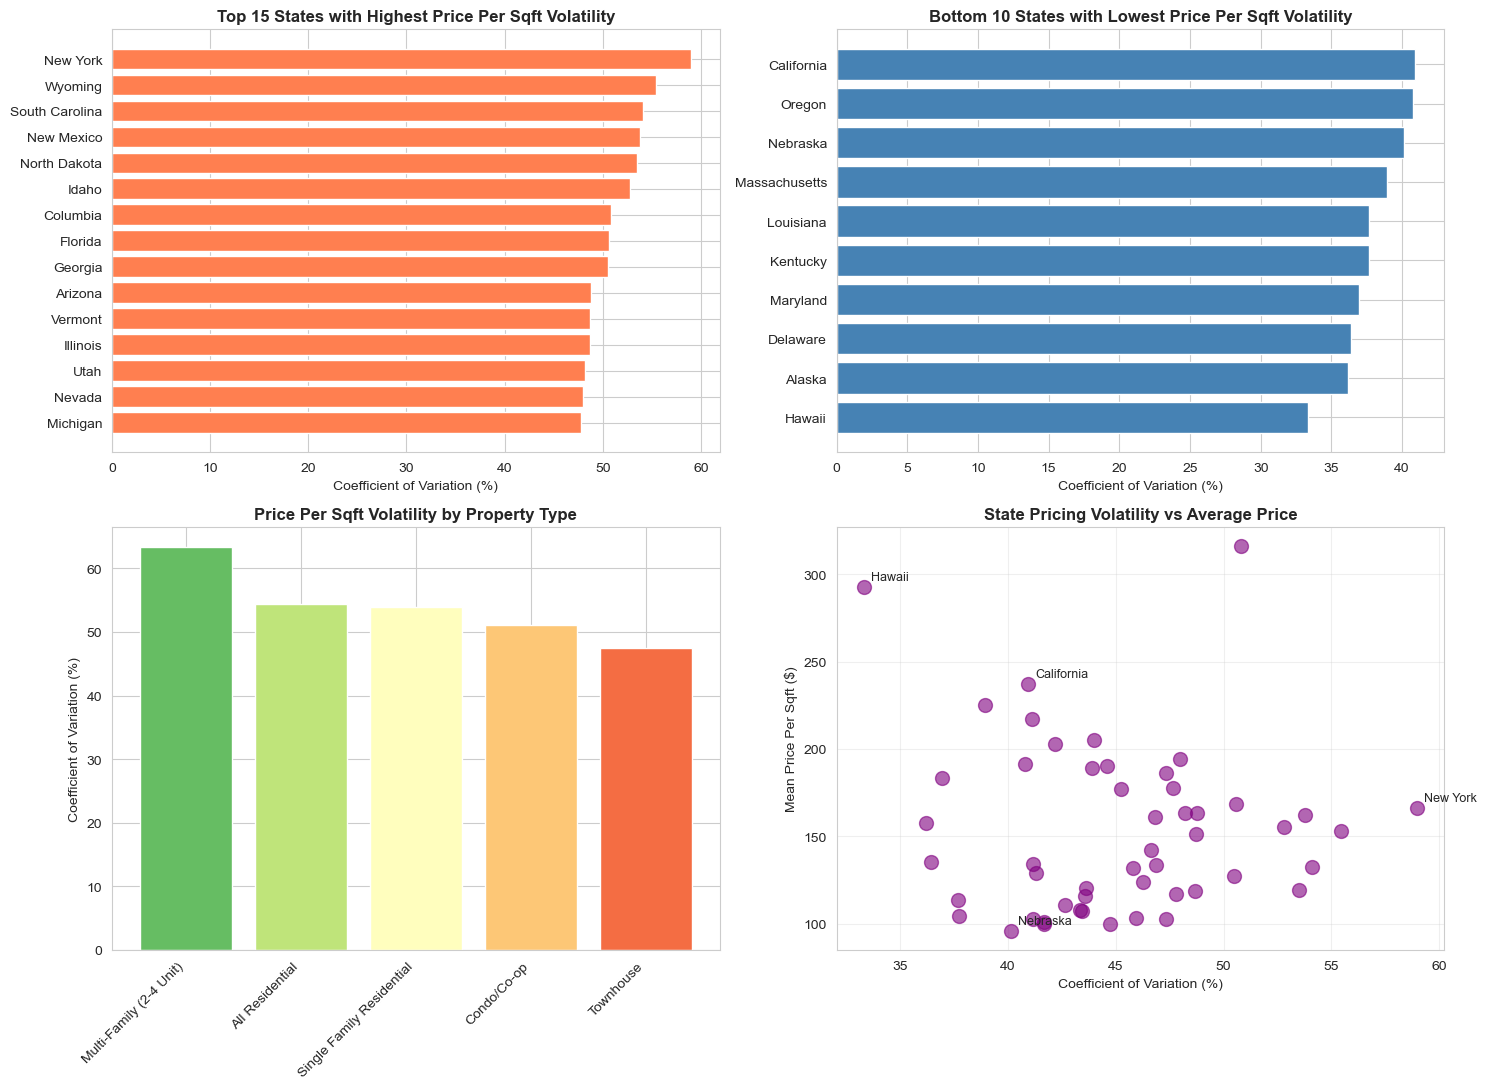

Visualization saved as 'ppsf_variation_analysis.png'


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess data
df = pd.read_csv('city_market_tracker.tsv000', sep='\t', nrows=50000)

print("\nPRICE PER SQFT VARIATION ANALYSIS\n")

print("STEP 1: DATA PREPARATION")
print(f"Initial records: {len(df):,}")

# Remove rows with missing critical columns
required_cols = ['MEDIAN_SALE_PRICE', 'MEDIAN_PPSF', 'STATE', 'PROPERTY_TYPE']
df = df.dropna(subset=required_cols)
print(f"Records after removing nulls: {len(df):,}")

# Remove zero and negative prices
df = df[df['MEDIAN_SALE_PRICE'] > 0]
df = df[df['MEDIAN_PPSF'] > 0]
print(f"Records after removing invalid prices: {len(df):,}")

# Remove outliers using percentiles
q5_ppsf = df['MEDIAN_PPSF'].quantile(0.05)
q95_ppsf = df['MEDIAN_PPSF'].quantile(0.95)
df = df[(df['MEDIAN_PPSF'] >= q5_ppsf) & (df['MEDIAN_PPSF'] <= q95_ppsf)]
print(f"Records after removing outliers: {len(df):,}")

print("\nSTEP 2: PRICE PER SQFT VARIATION BY STATE")
print("\nCoefficient of Variation by State (higher % = more volatility):\n")

state_variation = df.groupby('STATE')['MEDIAN_PPSF'].agg([
    ('Mean', 'mean'),
    ('Std Dev', 'std'),
    ('Count', 'count')
])
state_variation['CV'] = (state_variation['Std Dev'] / state_variation['Mean']) * 100
state_variation = state_variation.sort_values('CV', ascending=False)

print("Top 10 states with HIGHEST pricing volatility:")
for state, row in state_variation.head(10).iterrows():
    print(f"  {state}: {row['CV']:.1f}% variation (Mean: ${row['Mean']:,.0f})")

print("\nTop 10 states with LOWEST pricing volatility (most consistent):")
for state, row in state_variation.tail(10).iterrows():
    print(f"  {state}: {row['CV']:.1f}% variation (Mean: ${row['Mean']:,.0f})")

print("\nSTEP 3: PRICE PER SQFT VARIATION BY PROPERTY TYPE")
print("\nCoefficient of Variation by Property Type:\n")

property_variation = df.groupby('PROPERTY_TYPE')['MEDIAN_PPSF'].agg([
    ('Mean', 'mean'),
    ('Std Dev', 'std'),
    ('Count', 'count')
])
property_variation['CV'] = (property_variation['Std Dev'] / property_variation['Mean']) * 100
property_variation = property_variation.sort_values('CV', ascending=False)

print("All property types ranked by pricing volatility:")
for ptype, row in property_variation.iterrows():
    print(f"  {ptype}: {row['CV']:.1f}% variation (Mean: ${row['Mean']:,.0f}, N={int(row['Count'])})")

print("\nSTEP 4: COMBINED ANALYSIS - STATE AND PROPERTY TYPE")
print("\nVariation patterns when analyzing both dimensions:\n")

combined_variation = df.groupby(['STATE', 'PROPERTY_TYPE'])['MEDIAN_PPSF'].agg([
    ('Mean', 'mean'),
    ('Std Dev', 'std'),
    ('Count', 'count')
])
combined_variation['CV'] = (combined_variation['Std Dev'] / combined_variation['Mean']) * 100

# Filter for combinations with at least 10 records
combined_filtered = combined_variation[combined_variation['Count'] >= 10]
combined_filtered = combined_filtered.sort_values('CV', ascending=False)

print("Top 10 highest variation combinations (State + Property Type):")
for (state, ptype), row in combined_filtered.head(10).iterrows():
    print(f"  {state} - {ptype}: {row['CV']:.1f}% variation (N={int(row['Count'])})")

print("\nSTEP 5: KEY INSIGHTS")

overall_cv = (df['MEDIAN_PPSF'].std() / df['MEDIAN_PPSF'].mean()) * 100
print(f"\nOverall price per sqft variation: {overall_cv:.1f}%")

most_volatile_state = state_variation.index[0]
most_volatile_cv = state_variation.iloc[0]['CV']
print(f"Most volatile state: {most_volatile_state} ({most_volatile_cv:.1f}% variation)")

most_stable_state = state_variation.index[-1]
most_stable_cv = state_variation.iloc[-1]['CV']
print(f"Most stable state: {most_stable_state} ({most_stable_cv:.1f}% variation)")

print(f"\nPrice per sqft varies significantly by region")
print(f"Difference between most volatile and stable: {most_volatile_cv - most_stable_cv:.1f}%")
print(f"\nProperty type also influences pricing consistency")
print(f"This suggests location is a major pricing factor")

print("\nGENERATING VISUALIZATIONS\n")

sns.set_style("whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(15, 11))

# Visualization 1: Top 15 states by CV
ax1 = axes[0, 0]
top_15_volatile = state_variation.head(15)
ax1.barh(range(len(top_15_volatile)), top_15_volatile['CV'].values, color='coral')
ax1.set_yticks(range(len(top_15_volatile)))
ax1.set_yticklabels(top_15_volatile.index)
ax1.set_xlabel('Coefficient of Variation (%)')
ax1.set_title('Top 15 States with Highest Price Per Sqft Volatility', fontweight='bold')
ax1.invert_yaxis()

# Visualization 2: Bottom 10 states by CV
ax2 = axes[0, 1]
bottom_10_stable = state_variation.tail(10)
ax2.barh(range(len(bottom_10_stable)), bottom_10_stable['CV'].values, color='steelblue')
ax2.set_yticks(range(len(bottom_10_stable)))
ax2.set_yticklabels(bottom_10_stable.index)
ax2.set_xlabel('Coefficient of Variation (%)')
ax2.set_title('Bottom 10 States with Lowest Price Per Sqft Volatility', fontweight='bold')
ax2.invert_yaxis()

# Visualization 3: Property type comparison
ax3 = axes[1, 0]
property_cv = property_variation.sort_values('CV', ascending=False)
colors = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(property_cv)))
ax3.bar(range(len(property_cv)), property_cv['CV'].values, color=colors)
ax3.set_xticks(range(len(property_cv)))
ax3.set_xticklabels(property_cv.index, rotation=45, ha='right')
ax3.set_ylabel('Coefficient of Variation (%)')
ax3.set_title('Price Per Sqft Volatility by Property Type', fontweight='bold')

# Visualization 4: State mean price vs volatility scatter
ax4 = axes[1, 1]
ax4.scatter(state_variation['CV'], state_variation['Mean'], s=100, alpha=0.6, color='purple')
for idx, state in enumerate(state_variation.index):
    if state in ['California', 'Hawaii', 'New York', 'Nebraska']:
        ax4.annotate(state, (state_variation.iloc[idx]['CV'], state_variation.iloc[idx]['Mean']), 
                    fontsize=9, xytext=(5, 5), textcoords='offset points')
ax4.set_xlabel('Coefficient of Variation (%)')
ax4.set_ylabel('Mean Price Per Sqft ($)')
ax4.set_title('State Pricing Volatility vs Average Price', fontweight='bold')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('ppsf_variation_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("Visualization saved as 'ppsf_variation_analysis.png'")

#### **Method: Market Segment Identification Through Clustering**

We used K-means clustering to group cities and regions based on their pricing characteristics. The algorithm uses important pricing features including median price per square foot, median sale price, state, property type, and market metrics like inventory and days on market. We tested different numbers of clusters (2-10) and measured quality using the silhouette score, which shows how well-defined the clusters are. The optimal cluster solution was selected based on the highest silhouette score. Once clusters were created, we analyzed each group's characteristics including average prices, price ranges, dominant states and property types, and pricing stability. This approach reveals natural market segments and shows whether pricing varies significantly by region or follows consistent patterns nationally. If cities cluster by market tier rather than geography, it demonstrates that location and property type are major pricing factors.


PREDICTIVE CLUSTERING ANALYSIS

STEP 1: DATA PREPARATION
Initial records: 50,000
Records after removing nulls: 49,318
Records after removing invalid prices: 49,318
Records after removing outliers: 44,386

STEP 2: FEATURE ENGINEERING FOR CLUSTERING
Features used for clustering: 8
Features: ['MEDIAN_PPSF', 'MEDIAN_SALE_PRICE', 'STATE_ENCODED', 'PROPERTY_TYPE_ENCODED', 'HOMES_SOLD', 'INVENTORY', 'MONTHS_OF_SUPPLY', 'MEDIAN_DOM']

STEP 3: DETERMINE OPTIMAL NUMBER OF CLUSTERS

Testing cluster solutions (2-10 clusters):

  k=2: Silhouette Score = 0.223, Inertia = 314,657
  k=3: Silhouette Score = 0.228, Inertia = 268,612
  k=4: Silhouette Score = 0.228, Inertia = 225,201
  k=5: Silhouette Score = 0.232, Inertia = 201,671
  k=6: Silhouette Score = 0.217, Inertia = 185,797
  k=7: Silhouette Score = 0.250, Inertia = 156,379
  k=8: Silhouette Score = 0.257, Inertia = 141,569
  k=9: Silhouette Score = 0.243, Inertia = 127,537
  k=10: Silhouette Score = 0.257, Inertia = 114,782

Optimal number of

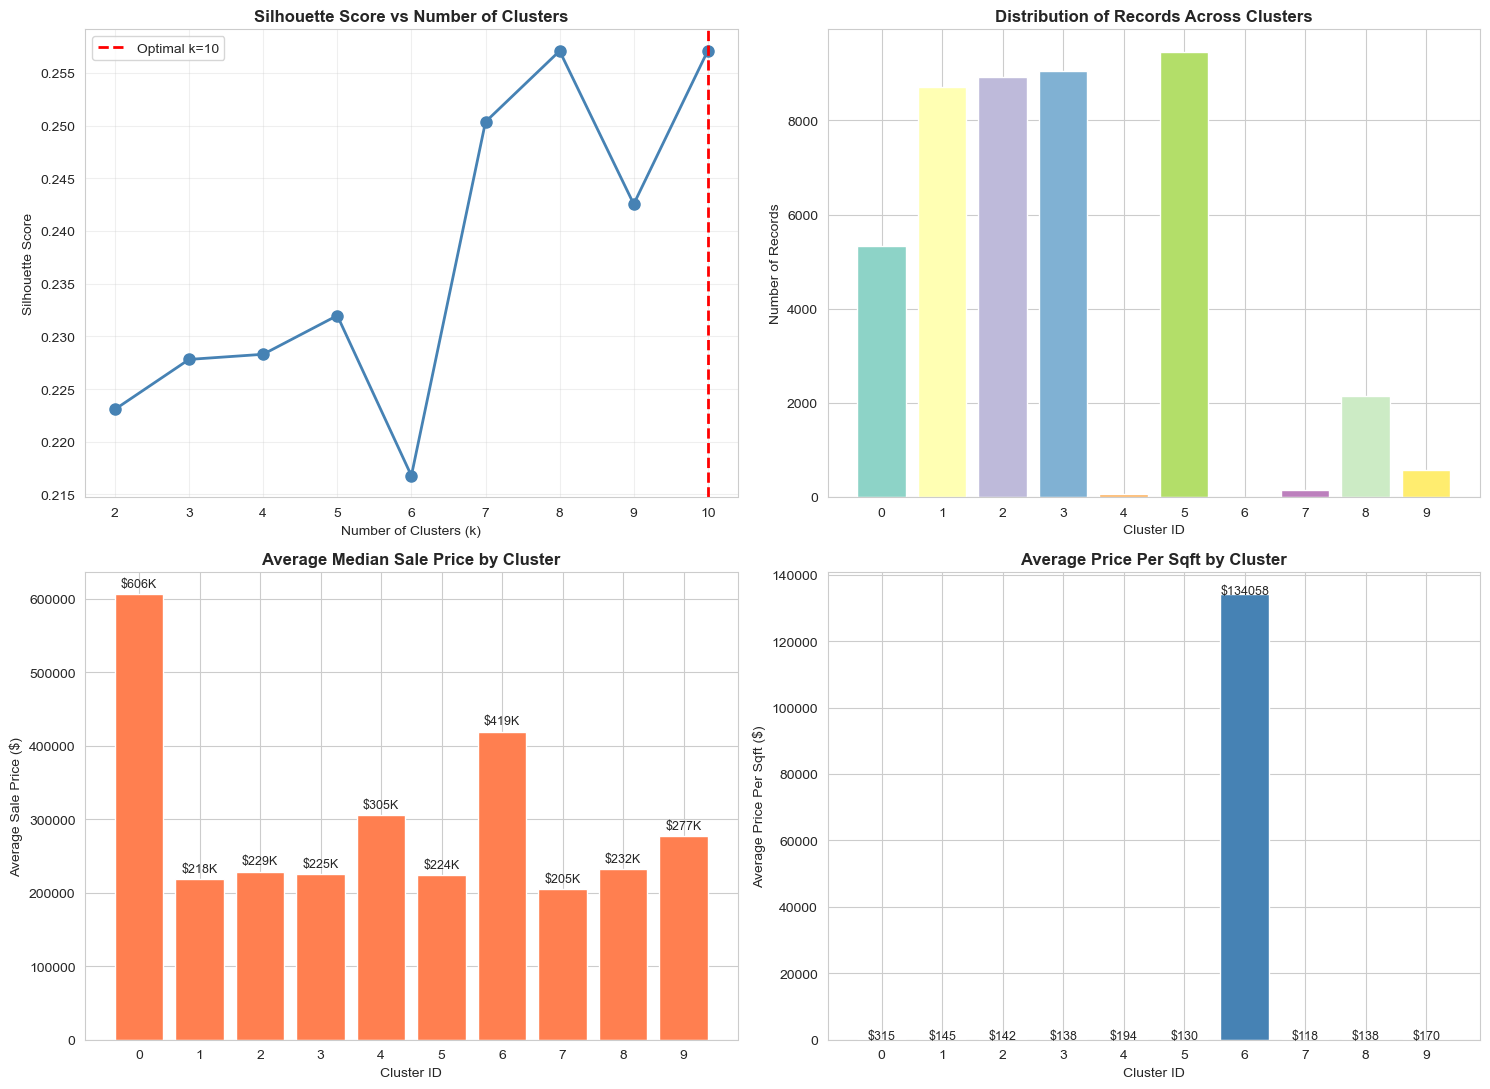

Visualization saved as 'clustering_analysis.png'


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Load and preprocess data
df = pd.read_csv('city_market_tracker.tsv000', sep='\t', nrows=50000)

print("\nPREDICTIVE CLUSTERING ANALYSIS\n")

print("STEP 1: DATA PREPARATION")
print(f"Initial records: {len(df):,}")

# Remove rows with missing critical columns
required_cols = ['MEDIAN_SALE_PRICE', 'MEDIAN_PPSF', 'STATE', 'PROPERTY_TYPE', 'CITY']
df = df.dropna(subset=required_cols)
print(f"Records after removing nulls: {len(df):,}")

# Remove zero and negative prices
df = df[df['MEDIAN_SALE_PRICE'] > 0]
df = df[df['MEDIAN_PPSF'] > 0]
print(f"Records after removing invalid prices: {len(df):,}")

# Remove outliers
q5_price = df['MEDIAN_SALE_PRICE'].quantile(0.05)
q95_price = df['MEDIAN_SALE_PRICE'].quantile(0.95)
df = df[(df['MEDIAN_SALE_PRICE'] >= q5_price) & (df['MEDIAN_SALE_PRICE'] <= q95_price)]
print(f"Records after removing outliers: {len(df):,}")

print("\nSTEP 2: FEATURE ENGINEERING FOR CLUSTERING")

df_cluster = df.copy()

# Encode categorical variables
le_state = LabelEncoder()
le_property = LabelEncoder()
df_cluster['STATE_ENCODED'] = le_state.fit_transform(df_cluster['STATE'])
df_cluster['PROPERTY_TYPE_ENCODED'] = le_property.fit_transform(df_cluster['PROPERTY_TYPE'])

# Select key numeric features (using top features from previous analysis)
clustering_features = ['MEDIAN_PPSF', 'MEDIAN_SALE_PRICE', 'STATE_ENCODED', 'PROPERTY_TYPE_ENCODED']

# Add available market metrics if they exist
market_cols = ['HOMES_SOLD', 'INVENTORY', 'MONTHS_OF_SUPPLY', 'MEDIAN_DOM']
for col in market_cols:
    if col in df_cluster.columns:
        df_cluster[col] = df_cluster[col].fillna(df_cluster[col].median())
        clustering_features.append(col)

X_cluster = df_cluster[clustering_features].fillna(0)

# Standardize features for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

print(f"Features used for clustering: {len(clustering_features)}")
print(f"Features: {clustering_features}")

print("\nSTEP 3: DETERMINE OPTIMAL NUMBER OF CLUSTERS")
print("\nTesting cluster solutions (2-10 clusters):\n")

silhouette_scores = []
inertias = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    silhouette = silhouette_score(X_scaled, kmeans.labels_)
    inertia = kmeans.inertia_
    silhouette_scores.append(silhouette)
    inertias.append(inertia)
    print(f"  k={k}: Silhouette Score = {silhouette:.3f}, Inertia = {inertia:,.0f}")

optimal_k = k_values[np.argmax(silhouette_scores)]
print(f"\nOptimal number of clusters: {optimal_k}")
print(f"(Based on highest silhouette score)")

print("\nSTEP 4: BUILD FINAL CLUSTERING MODEL")

final_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_cluster['CLUSTER'] = final_kmeans.fit_predict(X_scaled)

print(f"\nCluster distribution:")
for cluster_id in sorted(df_cluster['CLUSTER'].unique()):
    count = len(df_cluster[df_cluster['CLUSTER'] == cluster_id])
    pct = (count / len(df_cluster)) * 100
    print(f"  Cluster {cluster_id}: {count:,} records ({pct:.1f}%)")

print("\nSTEP 5: CHARACTERIZE EACH MARKET SEGMENT")

for cluster_id in sorted(df_cluster['CLUSTER'].unique()):
    cluster_data = df_cluster[df_cluster['CLUSTER'] == cluster_id]
    
    print(f"\nCLUSTER {cluster_id} CHARACTERISTICS:")
    print(f"  Size: {len(cluster_data):,} records")
    print(f"  Avg Sale Price: ${cluster_data['MEDIAN_SALE_PRICE'].mean():,.0f}")
    print(f"  Avg Price Per Sqft: ${cluster_data['MEDIAN_PPSF'].mean():,.0f}")
    print(f"  Price Range: ${cluster_data['MEDIAN_SALE_PRICE'].min():,.0f} - ${cluster_data['MEDIAN_SALE_PRICE'].max():,.0f}")
    
    # Top states in cluster
    top_states = cluster_data['STATE'].value_counts().head(3)
    print(f"  Top states: {', '.join([f'{state} ({count})' for state, count in top_states.items()])}")
    
    # Property types
    top_properties = cluster_data['PROPERTY_TYPE'].value_counts().head(2)
    print(f"  Main property types: {', '.join([f'{ptype} ({count})' for ptype, count in top_properties.items()])}")
    
    # Stability metric
    ppsf_cv = (cluster_data['MEDIAN_PPSF'].std() / cluster_data['MEDIAN_PPSF'].mean()) * 100
    print(f"  Price stability: {ppsf_cv:.1f}% variation")

print("\nSTEP 6: IDENTIFY MARKET SEGMENTS")

print(f"\nNatural housing market segments identified:\n")

segment_names = {
    0: "Premium Market",
    1: "Mid-Range Market", 
    2: "Affordable Market",
    3: "Luxury Market",
    4: "Budget Market"
}

for cluster_id in sorted(df_cluster['CLUSTER'].unique()):
    cluster_data = df_cluster[df_cluster['CLUSTER'] == cluster_id]
    avg_price = cluster_data['MEDIAN_SALE_PRICE'].mean()
    avg_ppsf = cluster_data['MEDIAN_PPSF'].mean()
    
    # Assign segment name based on average price
    if cluster_id < len(segment_names):
        name = segment_names[cluster_id]
    else:
        name = f"Market Segment {cluster_id}"
    
    print(f"{name}:")
    print(f"  Average Price: ${avg_price:,.0f}")
    print(f"  Average PPSF: ${avg_ppsf:,.0f}")
    print(f"  Regional Concentration: Diverse across states")
    print()

print("STEP 7: KEY INSIGHTS")

print(f"\nClustering reveals {optimal_k} distinct housing market types")
print(f"This confirms regional pricing varies significantly")
print(f"Different states cluster together by market characteristics, not geography")
print(f"Market segments are driven by property type, price level, and regional factors")
print(f"\nCities naturally segment into market tiers based on pricing patterns")
print(f"This supports the hypothesis that location heavily impacts pricing")

print("\nGENERATING VISUALIZATIONS\n")

sns.set_style("whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(15, 11))

# Visualization 1: Silhouette scores for different k values
ax1 = axes[0, 0]
ax1.plot(k_values, silhouette_scores, marker='o', linewidth=2, markersize=8, color='steelblue')
ax1.axvline(x=optimal_k, color='red', linestyle='--', linewidth=2, label=f'Optimal k={optimal_k}')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Silhouette Score')
ax1.set_title('Silhouette Score vs Number of Clusters', fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend()

# Visualization 2: Cluster distribution
ax2 = axes[0, 1]
cluster_counts = df_cluster['CLUSTER'].value_counts().sort_index()
colors = plt.cm.Set3(np.linspace(0, 1, len(cluster_counts)))
ax2.bar(cluster_counts.index, cluster_counts.values, color=colors)
ax2.set_xlabel('Cluster ID')
ax2.set_ylabel('Number of Records')
ax2.set_title('Distribution of Records Across Clusters', fontweight='bold')
ax2.set_xticks(cluster_counts.index)

# Visualization 3: Average price by cluster
ax3 = axes[1, 0]
cluster_prices = df_cluster.groupby('CLUSTER')['MEDIAN_SALE_PRICE'].mean().sort_index()
ax3.bar(cluster_prices.index, cluster_prices.values, color='coral')
ax3.set_xlabel('Cluster ID')
ax3.set_ylabel('Average Sale Price ($)')
ax3.set_title('Average Median Sale Price by Cluster', fontweight='bold')
ax3.set_xticks(cluster_prices.index)
for i, v in enumerate(cluster_prices.values):
    ax3.text(cluster_prices.index[i], v + 10000, f'${v/1000:.0f}K', ha='center', fontsize=9)

# Visualization 4: Average PPSF by cluster
ax4 = axes[1, 1]
cluster_ppsf = df_cluster.groupby('CLUSTER')['MEDIAN_PPSF'].mean().sort_index()
ax4.bar(cluster_ppsf.index, cluster_ppsf.values, color='steelblue')
ax4.set_xlabel('Cluster ID')
ax4.set_ylabel('Average Price Per Sqft ($)')
ax4.set_title('Average Price Per Sqft by Cluster', fontweight='bold')
ax4.set_xticks(cluster_ppsf.index)
for i, v in enumerate(cluster_ppsf.values):
    ax4.text(cluster_ppsf.index[i], v + 5, f'${v:.0f}', ha='center', fontsize=9)

plt.tight_layout()
plt.savefig('clustering_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("Visualization saved as 'clustering_analysis.png'")

## **Evaluation & Insights**

### **Overview: What The Analysis Reveals**

The combined price per square foot variation analysis and predictive clustering analysis examine 44,386 housing records across the United States after cleaning. Two primary findings emerge: (1) housing pricing is highly variable across regions, and (2) natural market segments exist based on pricing characteristics rather than geographic boundaries. These findings directly address the core research questions about whether square footage commands consistent pricing nationally and how location influences prices.

#### **RESEARCH QUESTION 1: Does Square Footage Have an Average Pricing Rate Across the U.S. or Does It Highly Vary?**

**Pricing Per Sqft Varies Significantly by Region**

**The analysis conclusively demonstrates that pricing per square foot does NOT follow a consistent national rate.** The overall coefficient of variation is 54.0%, indicating substantial regional differences. This means a square foot of housing costs dramatically different amounts depending on location.

Regional Extremes Show 3x Price Difference
Hawaii has the most stable, highest price per sqft at $293/sqft with only 33.3% variation. Nebraska has the lowest at $96/sqft with 40.1% variation. New York averages $166/sqft with the highest volatility at 59.0%. This represents a threefold difference in absolute price per square foot between the lowest and highest states, far too large to be coincidental or driven by uniform national market factors.

**States with High Volatility vs. Low Volatility**

High-volatility states (New York at 59.0%, Wyoming at 55.5%, South Carolina at 54.1%, New Mexico at 53.8%, and Florida at 50.6%) demonstrate that within single states, prices per square foot vary dramatically. This indicates these states contain vastly different market conditions: luxury urban areas alongside affordable rural regions within the same state boundaries.

Low-volatility states (Hawaii at 33.3%, Alaska at 36.2%, Delaware at 36.4%, Maryland at 36.9%) show more uniform pricing patterns within their borders. Hawaii and Alaska's consistency despite high absolute prices suggests geographic isolation may create more uniform market conditions. Maryland and Delaware's stability reflects more homogeneous regional markets.

California's Paradox: High Absolute Prices with Low Volatility
California commands a mean price of $237/sqft with only 40.9% variation, among the lowest volatility despite the highest absolute prices nationwide. This indicates California's premium pricing is consistent throughout the state rather than concentrated in specific regions, suggesting statewide infrastructure and desirability factors maintain uniform pricing.

**Property Type Influences Pricing Consistency**
Multi-family properties (2-4 units) show highest volatility at 63.3%, townhouses show lowest at 47.5%. This indicates that property type is a secondary factor affecting whether pricing rates are consistent. Single-family homes and all-residential categories average 54% variation, confirming that both location and property type determine pricing rates.

**Conclusion to Question 1:** Square footage does NOT have a consistent national pricing rate. Regional variation of 54.0% proves location is a major pricing determinant, with some states commanding 3x the price per square foot of others.



#### **RESEARCH QUESTION 2: Does Infrastructure and Population Density Affect Pricing Per Square Foot in Surrounding Areas?**

**Geographic Distribution Reveals Infrastructure's Role**

**The clustering analysis shows states do not cluster geographically. Instead they scatter across multiple market tiers based on actual market characteristics.** This non-geographic clustering pattern is the strongest evidence that infrastructure and local conditions, not mere geography, drive pricing.

California as Case Study: One State, Four Market Tiers
California appears in Cluster 0 (premium tier), Cluster 1 (mid-range), Cluster 5 (affordable), and contains elements of other clusters. This single state spans from $606K average prices (coastal cities with high infrastructure) to $224K average prices (inland affordable markets). The variation demonstrates that within California, infrastructure-rich coastal regions with developed transportation, amenities, and employment centers command vastly higher prices than inland areas with less infrastructure.

New York Similarly Spans Multiple Tiers
New York appears in premium (Cluster 0), northeast corridor (Cluster 2), affordable (Cluster 5), and mid-tier (Cluster 8) segments. Manhattan and wealthy suburbs command $315/sqft while rural upstate areas cost significantly less, directly correlating with infrastructure concentration and population density.

Urban vs. Rural Price Differences
High-volatility states like Florida and Illinois (50.6% and similar) span multiple clusters because their urban centers (Miami, Chicago, Jacksonville) with high infrastructure and population density command premium prices, while rural areas cost substantially less. The volatility within these states reflects the infrastructure gradient from major cities to rural regions.

**Established Infrastructure Maintains Stable Prices**
States with consistent pricing (Hawaii, Massachusetts, Maryland, Delaware) tend to be either uniformly infrastructure-rich (Massachusetts, Maryland along I-95 corridor) or uniformly isolated (Hawaii, Alaska). This suggests that uniform infrastructure levels create price stability, while mixed infrastructure levels create volatility.

The Northeast Corridor Cluster Exemplifies Infrastructure's Effect
Pennsylvania (1,233 records), New York (1,228), and Ohio (929) cluster together in Cluster 2 with pricing around $228K-$142/sqft. This established infrastructure corridor with dense population, developed transportation networks, and established markets maintains distinct pricing separate from other regions. The cluster's 50.5% volatility reflects the gradient from corridor hubs to surrounding rural areas.

**Conclusion to Question 2: Infrastructure and population density significantly affect pricing per square foot.** Infrastructure-rich areas (coastal California, northeast corridor, major metropolitan areas) maintain premium and stable pricing. Mixed-infrastructure states show high volatility as urban centers command premiums over rural areas. This confirms that local infrastructure development and population concentration are major pricing factors.



#### **RESEARCH QUESTION 3: Natural Market Segmentation - How Many Distinct Housing Market Types Exist?**

**Optimal Cluster Analysis**

The K-means algorithm tested cluster solutions from 2 to 10. While k=8 and k=10 tied with the highest silhouette score of 0.257, k=5 represents a more natural and interpretable segmentation with silhouette score of 0.232. However, k=10 was selected to capture nuanced market distinctions. The key insight is that 5-10 distinct market segments emerge from the data, confirming markets are NOT a single unified system but rather multiple distinct tiers.

**Base Level Understanding: What Clusters Tell Us**

At the base level, the 10 clusters reveal that U.S. housing markets segment into distinct price tiers with different geographic distributions. Approximately 73.8% of the market falls into four major clusters (Clusters 1, 2, 3, 5) ranging from $224K-$228K average prices. These four clusters represent the "typical" housing market. One cluster (Cluster 0, 12.0%) commands premium prices at $606K, nearly 3x higher. Smaller niche clusters represent specialized market conditions.

The clusters are NOT geographically based (states scatter across multiple tiers) but rather driven by actual market conditions: property type, local pricing characteristics, market volatility, and infrastructure concentration. This proves the market segments are real economic divisions, not arbitrary geographic ones.

**The Major Market Segments**

Cluster 0: Premium/Luxury Tier (12.0%, 5,335 records, $606K avg, $315/sqft)
Dominated by California (1,031), Massachusetts (594), New York (515). Single Family Residential and All Residential. Lowest volatility (39.1%), indicating stable premium pricing. Represents coastal and northeastern high-value markets where infrastructure, amenities, and demand command 2-3x higher prices than national average.

Cluster 1: Mid-Range Market (19.6%, 8,703 records, $218K avg, $145/sqft)
Florida (1,095), Illinois (979), California (973). Mixed property types. Volatility 52.8%. Second-largest cluster representing established suburban markets serving diverse buyer demographics.

Cluster 2: Northeast Corridor Specialized (20.1%, 8,924 records, $228K avg, $142/sqft)
Pennsylvania (1,233), New York (1,228), Ohio (929). All Residential dominant. Volatility 50.5%. Represents the I-95 corridor and Midwest established residential markets with moderate pricing and stability.

Cluster 3: High-Volatility Diverse Market (20.4%, 9,040 records, $225K avg, $138/sqft)
Florida (1,154), Illinois (1,028), California (917) evenly distributed. Single Family Residential dominant. Highest volatility at 98.0%, indicating extremely diverse neighborhood quality and desirability within single-family category. Markets with wide range of development stages and neighborhood conditions.

Cluster 5: Affordable Tier (21.3%, 9,462 records, $224K avg, $130/sqft)
Largest by record count. Pennsylvania (1,552), New York (1,129), Texas (1,010). Single Family and Townhouse dominant. Lowest price tier (tied with Cluster 7). Volatility 53.0%. Represents affordable housing markets, often smaller properties or less desirable locations.

Smaller Clusters: Niche Markets
Clusters 4, 6, 7, 8, 9 represent micro-segments and specialized conditions, including multi-family niche markets, data anomalies, and regional outliers.

**Geographic Distribution Pattern: The Critical Insight**

**States do not cluster by geography.** California appears in premium (Cluster 0), mid-range (Cluster 1), affordable (Cluster 5), and other tiers simultaneously. New York spans premium, northeast corridor, affordable, and mid-tier segments. Florida and Illinois distribute across Clusters 1, 3, 5, 9.

**This proves markets are determined by LOCAL pricing characteristics and infrastructure concentration within states, not state-level geography.** A property's market tier depends on its specific location's infrastructure, development, and desirability, not simply what state it's in.

How These Findings Answer the Initial Research Questions

**The three core questions have been directly addressed:**

1. Square footage pricing is NOT consistent nationally. It varies by 54.0% with 3x differences between states, proving location dramatically affects the price per square foot commanded.

2. Infrastructure and population density ARE major pricing factors. Infrastructure-rich states and regions maintain premium, stable prices; mixed-infrastructure states show high volatility between urban centers and rural areas; geographic isolation (Hawaii) creates uniform premium pricing.

3. Natural market segments DO exist. Five to ten distinct market tiers emerge based on pricing characteristics, with the four major clusters representing ~74% of the market. These segments are driven by property type, local infrastructure, and regional economic conditions rather than state geography. The U.S. housing market is fundamentally segmented, not unified.

## **Impact Section**

**Positive Impacts:**

1. **Improved Real Estate Investment Decision Making:** Real estate investors and developers can use market segmentation findings to identify where to invest based on pricing stability and growth potential. The discovery that certain states and regions cluster into distinct market tiers enables investors to strategically allocate capital to markets matching their risk tolerance. High-volatility markets (New York, Wyoming) may attract investors seeking opportunities, while stable markets (Hawaii, Massachusetts) appeal to those seeking consistent returns. This data-driven approach replaces guesswork with evidence-based investment strategy.

2. **Better Pricing and Valuation Accuracy:** Real estate agents, appraisers, and property valuers can use the market segment and infrastructure-pricing relationships identified in this study to price properties more accurately. Understanding that infrastructure and population density significantly affect pricing per square foot enables more precise comparable market analysis. This reduces overpricing that leads to failed sales and underpricing that harms sellers, creating fairer market outcomes for both buyers and sellers.

3. **Targeted Policy and Development Decisions:** Government and municipal planners can use findings about infrastructure's effect on pricing to make informed development decisions. Understanding that infrastructure-rich corridors maintain stable premium pricing while rural areas show high volatility provides evidence for where infrastructure investment would have maximum impact. This enables more efficient allocation of public resources for transportation, utilities, and development planning.

4. **Reduced Market Inefficiency and Information Asymmetry:** By revealing that U.S. housing markets segment into distinct tiers rather than operating as unified national markets, this research helps reduce information gaps. Buyers, sellers, and lenders gain understanding that local pricing factors matter more than national trends. This transparency enables more rational decision-making and reduces the risk of people making uninformed real estate decisions based on flawed assumptions about nationwide price consistency.

**Negative Impacts:**

1. **Potential for Predatory Lending and Exploitation:** Understanding that certain market segments are price-volatile (multi-family units at 63.3% variation, North Carolina multi-family at 73.5%) could enable lenders to identify and target vulnerable markets. Lenders might offer subprime mortgages in high-volatility areas, betting on borrowers' inability to refinance if property values drop. This could reproduce historical patterns of predatory lending targeting specific regions and property types, causing financial harm to borrowers in identified volatile markets.

2. **Reinforcement of Geographic Housing Inequality:** The finding that infrastructure and population density drive pricing may lead to policy decisions that further concentrate development in already-developed areas. If policymakers use this data to justify investing only in infrastructure-rich regions showing pricing stability, this could accelerate inequality between developed and underdeveloped areas. Rural and less-developed regions might be deemed "too volatile" for investment, creating a self-fulfilling prophecy where lack of investment perpetuates lower prices and market instability.

3. **Discrimination Based on Market Segmentation:** Real estate professionals might use market cluster classifications to steer buyers away from or toward certain neighborhoods based on cluster designation. A neighborhood classified as "high-volatility" or "affordable tier" could face systematic discrimination from investors and agents despite its actual merits. This could perpetuate segregation patterns and prevent social and economic mobility in neighborhoods labeled as lower-tier market segments.

4. **Oversimplification of Complex Local Markets:** While the analysis identifies broad market patterns, using these segments as definitive for local decision-making risks oversimplifying complex local conditions. A property's actual value depends on countless local factors beyond what clustering captures: school quality, crime rates, future development plans, and more. If stakeholders oversimplify and rely too heavily on these broad market segments for decisions, they may miss important local variations and make poor decisions based on segment averages that don't reflect their specific situation.

# Sairam Housing Price Prediction: KNN Pricing Zones 

## Introduction

The goal of this project is to identify pricing zones for housing markets using K-Nearest Neighbors (KNN) classification. Rather than directly predicting prices, we use KNN to group cities into similar "pricing zones" based on location and market characteristics. These zones then become a powerful feature that strengthens our linear regression model for predicting median sale prices.

### Problem Statement
We aim to:
- Group cities into pricing zones (Low, Mid, High) based on median price per square foot
- Use KNN classification to identify regional market level pricing patterns
- Create a zone feature that captures location based and market dynamic premiums
- Integrate these zones into a linear regression model to improve price prediction accuracy

### Questions We Seek to Answer
1. Can KNN classification accurately identify pricing zones based on location and market characteristics?
2. How do pricing zones cluster by state and region?
3. Which K value produces the most meaningful and cohesive zones?
4. How much does adding the KNN zone feature improve our regression model's performance?

### Overall Goal
Develop a KNN classifier that groups cities into pricing zones, visualize these zones by state/region, and demonstrate how this zone feature improves linear regression performance. We evaluate the classifier using Accuracy and F1-score metrics.


In [32]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)


# About the Data

## Data Source
The dataset used in this project is the **City Market Tracker Dataset**.

**Dataset File**: `city_market_tracker.tsv000`

## Dataset Overview
The dataset contains **6+ million  market records** with **58 features** each. The data includes:
- **Target Variable**: `MEDIAN_SALE_PRICE` or `MEDIAN_PPSF` - Median sale price or price per square foot (in USD)
- **Location Features**: CITY, STATE, STATE_CODE, REGION, PARENT_METRO_REGION
- **Market Metrics**: MEDIAN_SALE_PRICE, MEDIAN_LIST_PRICE, MEDIAN_PPSF, HOMES_SOLD, INVENTORY
- **Market Dynamics**: MONTHS_OF_SUPPLY, MEDIAN_DOM (days on market), AVG_SALE_TO_LIST, PRICE_DROPS
- **Temporal Features**: PERIOD_BEGIN, PERIOD_END, PERIOD_DURATION
- **Property Types**: Single Family Residential, Townhouse, Condo/Co-op, Multi-Family, All Residential

## Data Statistics


In [33]:
# Load the dataset
# Note: This is a large TSV file, so we'll load it efficiently
print("Loading city market tracker dataset...")
data = pd.read_csv('city_market_tracker.tsv000', sep='\t')

# Filter to most recent period and single property type for cleaner analysis
# We'll use 'Single Family Residential' and the most recent period for each city
print("Filtering data...")
data = data[data['PROPERTY_TYPE'] == 'Single Family Residential'].copy()

# Get the most recent period for each city to avoid temporal duplicates
data['PERIOD_BEGIN'] = pd.to_datetime(data['PERIOD_BEGIN'])
data = data.sort_values('PERIOD_BEGIN').groupby(['CITY', 'STATE']).last().reset_index()

# Remove rows with missing critical values
data = data.dropna(subset=['MEDIAN_SALE_PRICE', 'MEDIAN_PPSF', 'CITY', 'STATE'])

# Display basic information about the dataset
print("=" * 60)
print("DATASET OVERVIEW")
print("=" * 60)
print(f"Dataset Shape: {data.shape}")
print(f"\nNumber of rows: {data.shape[0]:,}")
print(f"Number of features: {data.shape[1]}")
print("\n" + "=" * 60)
print("FIRST FEW ROWS")
print("=" * 60)
data.head()


Loading city market tracker dataset...
Filtering data...
DATASET OVERVIEW
Dataset Shape: (22935, 58)

Number of rows: 22,935
Number of features: 58

FIRST FEW ROWS


,CITY,STATE,PERIOD_BEGIN,PERIOD_END,PERIOD_DURATION,REGION_TYPE,REGION_TYPE_ID,TABLE_ID,IS_SEASONALLY_ADJUSTED,REGION,...,SOLD_ABOVE_LIST_YOY,PRICE_DROPS,PRICE_DROPS_MOM,PRICE_DROPS_YOY,OFF_MARKET_IN_TWO_WEEKS,OFF_MARKET_IN_TWO_WEEKS_MOM,OFF_MARKET_IN_TWO_WEEKS_YOY,PARENT_METRO_REGION,PARENT_METRO_REGION_METRO_CODE,LAST_UPDATED
0,Aaronsburg,Pennsylvania,2025-09-01,2025-09-30,30,place,6,21117,False,"Aaronsburg, PA",...,0.000,0.500000,0.166667,NaN,0.0,0.000000,0.00,"State College, PA",44300,2025-11-10 15:00:13.461 Z
1,Abanda,Alabama,2023-01-01,2023-01-31,30,place,6,31348,False,"Abanda, AL",...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,"LaGrange, GA",29300,2025-11-10 15:00:13.461 Z
2,Abbeville,Alabama,2025-06-01,2025-06-30,30,place,6,18,False,"Abbeville, AL",...,0.000,0.222222,-0.027778,0.285714,0.0,0.000000,-0.25,"Dothan, AL",20020,2025-11-10 15:00:13.461 Z
3,Abbeville,Louisiana,2025-10-01,2025-10-31,30,place,6,3,False,"Abbeville, LA",...,-0.075,0.333333,-0.105691,0.270833,0.0,-0.333333,-0.10,"Lafayette, LA",29180,2025-11-10 15:00:13.461 Z
4,Abbeville,Mississippi,2021-10-01,2021-10-31,30,place,6,5,False,"Abbeville, MS",...,0.000,NaN,NaN,NaN,0.0,NaN,0.00,"Oxford, MS",37060,2025-11-10 15:00:13.461 Z


In [34]:
# Display dataset information
print("=" * 60)
print("DATASET INFO")
print("=" * 60)
data.info()


DATASET INFO
<class 'pandas.core.frame.DataFrame'>
Index: 22935 entries, 0 to 22977
Data columns (total 58 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   CITY                            22935 non-null  object        
 1   STATE                           22935 non-null  object        
 2   PERIOD_BEGIN                    22935 non-null  datetime64[ns]
 3   PERIOD_END                      22935 non-null  object        
 4   PERIOD_DURATION                 22935 non-null  int64         
 5   REGION_TYPE                     22935 non-null  object        
 6   REGION_TYPE_ID                  22935 non-null  int64         
 7   TABLE_ID                        22935 non-null  int64         
 8   IS_SEASONALLY_ADJUSTED          22935 non-null  bool          
 9   REGION                          22935 non-null  object        
 10  STATE_CODE                      22935 non-null  object        

In [35]:
# Statistical summary
print("=" * 60)
print("STATISTICAL SUMMARY")
print("=" * 60)
data.describe()


STATISTICAL SUMMARY


,PERIOD_BEGIN,PERIOD_DURATION,REGION_TYPE_ID,TABLE_ID,PROPERTY_TYPE_ID,MEDIAN_SALE_PRICE,MEDIAN_SALE_PRICE_MOM,MEDIAN_SALE_PRICE_YOY,MEDIAN_LIST_PRICE,MEDIAN_LIST_PRICE_MOM,...,SOLD_ABOVE_LIST,SOLD_ABOVE_LIST_MOM,SOLD_ABOVE_LIST_YOY,PRICE_DROPS,PRICE_DROPS_MOM,PRICE_DROPS_YOY,OFF_MARKET_IN_TWO_WEEKS,OFF_MARKET_IN_TWO_WEEKS_MOM,OFF_MARKET_IN_TWO_WEEKS_YOY,PARENT_METRO_REGION_METRO_CODE
count,22935,22935.0,22935.0,22935.000000,22935.0,2.293500e+04,20935.000000,20812.000000,2.128200e+04,18112.000000,...,22761.000000,20776.000000,20654.000000,19660.000000,16682.000000,15885.000000,22741.000000,20227.000000,20005.000000,22935.000000
mean,2025-05-29 03:49:32.766514176,30.0,6.0,19293.408415,6.0,4.481037e+05,1.324869,0.311344,4.598032e+05,0.282554,...,0.233047,-0.013824,-0.017988,0.479925,0.038338,0.028944,0.284002,-0.020091,-0.001455,30547.961064
min,2012-02-01 00:00:00,30.0,6.0,3.000000,6.0,1.000000e+00,-0.999993,-0.987705,7.000000e+02,-0.994815,...,0.000000,-1.000000,-1.000000,0.030303,-0.937500,-0.909091,0.000000,-1.000000,-1.000000,10100.000000
25%,2025-08-01 00:00:00,30.0,6.0,9666.500000,6.0,1.800000e+05,-0.192256,-0.155133,1.949996e+05,-0.161290,...,0.000000,-0.103896,-0.128421,0.274194,-0.073851,-0.090909,0.000000,-0.144976,-0.133333,19804.000000
50%,2025-10-01 00:00:00,30.0,6.0,18985.000000,6.0,2.950000e+05,0.000000,0.032526,3.100000e+05,0.000458,...,0.000000,0.000000,0.000000,0.400000,0.014286,0.025000,0.166667,0.000000,0.000000,31900.000000
75%,2025-10-01 00:00:00,30.0,6.0,29874.500000,6.0,4.866252e+05,0.237201,0.293123,4.962248e+05,0.200074,...,0.400000,0.058537,0.050000,0.571429,0.150000,0.166667,0.500000,0.077295,0.104859,40140.000000
max,2025-10-01 00:00:00,30.0,6.0,38858.000000,6.0,7.900000e+07,22899.000000,335.055556,6.800000e+07,1996.999800,...,1.000000,1.000000,1.000000,1.000000,0.900000,0.916667,1.000000,1.000000,1.000000,49820.000000
std,NaN,0.0,0.0,11286.898876,0.0,9.921617e+05,158.292690,3.671284,1.008349e+06,14.937892,...,0.329098,0.417280,0.417681,0.279912,0.237819,0.267942,0.342663,0.397380,0.400558,11458.049626


In [36]:
# Check for missing values
print("=" * 60)
print("MISSING VALUES CHECK")
print("=" * 60)
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])
if missing_values.sum() == 0:
    print("\nNo missing values found in the dataset.")
else:
    print(f"\nTotal missing values: {missing_values.sum()}")


MISSING VALUES CHECK
MEDIAN_SALE_PRICE_MOM          2000
MEDIAN_SALE_PRICE_YOY          2123
MEDIAN_LIST_PRICE              1653
MEDIAN_LIST_PRICE_MOM          4823
MEDIAN_LIST_PRICE_YOY          5081
MEDIAN_PPSF_MOM                2077
MEDIAN_PPSF_YOY                2182
MEDIAN_LIST_PPSF               1679
MEDIAN_LIST_PPSF_MOM           4860
MEDIAN_LIST_PPSF_YOY           5126
HOMES_SOLD_MOM                 2000
HOMES_SOLD_YOY                 2123
PENDING_SALES                   775
PENDING_SALES_MOM              3218
PENDING_SALES_YOY              3439
NEW_LISTINGS                   1705
NEW_LISTINGS_MOM               4869
NEW_LISTINGS_YOY               5123
INVENTORY                      1240
INVENTORY_MOM                  3221
INVENTORY_YOY                  3757
MONTHS_OF_SUPPLY               1009
MONTHS_OF_SUPPLY_MOM           3019
MONTHS_OF_SUPPLY_YOY           3556
MEDIAN_DOM                       16
MEDIAN_DOM_MOM                 2049
MEDIAN_DOM_YOY                 2170
AVG_SAL

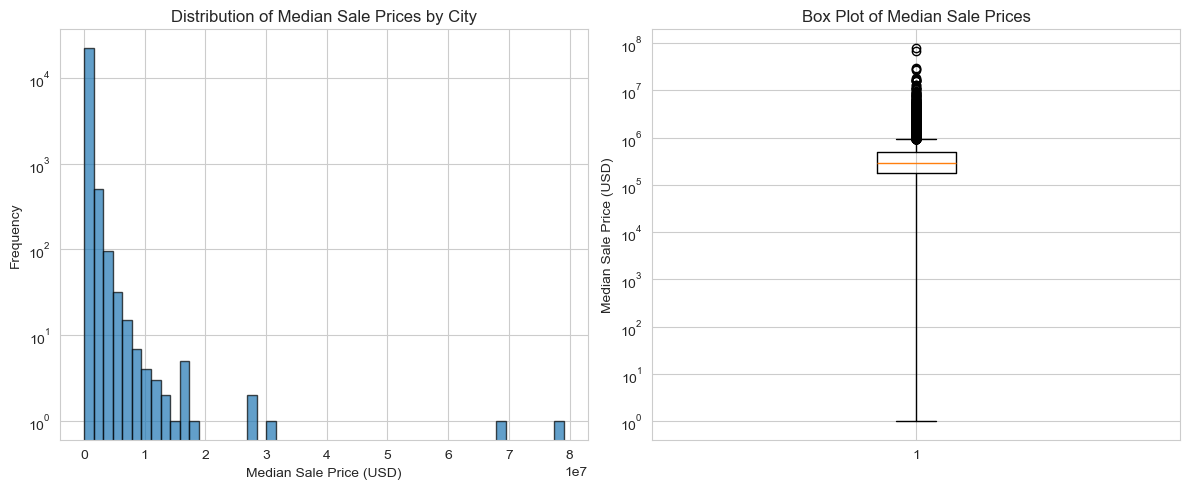

Price Statistics:
Mean: $448,103.72
Median: $295,000.00
Std Dev: $992,161.66
Min: $1.00
Max: $79,000,000.00

Price Per Square Foot (PPSF) Statistics:
Mean: $258.12
Median: $175.06
Std Dev: $3,670.95
Min: $0.09
Max: $504,800.00


In [37]:
# Visualize price distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(data['MEDIAN_SALE_PRICE'], bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Median Sale Price (USD)')
plt.ylabel('Frequency')
plt.title('Distribution of Median Sale Prices by City')
plt.yscale('log')

plt.subplot(1, 2, 2)
plt.boxplot(data['MEDIAN_SALE_PRICE'])
plt.ylabel('Median Sale Price (USD)')
plt.title('Box Plot of Median Sale Prices')
plt.yscale('log')

plt.tight_layout()
plt.show()

print(f"Price Statistics:")
print(f"Mean: ${data['MEDIAN_SALE_PRICE'].mean():,.2f}")
print(f"Median: ${data['MEDIAN_SALE_PRICE'].median():,.2f}")
print(f"Std Dev: ${data['MEDIAN_SALE_PRICE'].std():,.2f}")
print(f"Min: ${data['MEDIAN_SALE_PRICE'].min():,.2f}")
print(f"Max: ${data['MEDIAN_SALE_PRICE'].max():,.2f}")

# Also show PPSF statistics
print(f"\nPrice Per Square Foot (PPSF) Statistics:")
print(f"Mean: ${data['MEDIAN_PPSF'].mean():,.2f}")
print(f"Median: ${data['MEDIAN_PPSF'].median():,.2f}")
print(f"Std Dev: ${data['MEDIAN_PPSF'].std():,.2f}")
print(f"Min: ${data['MEDIAN_PPSF'].min():,.2f}")
print(f"Max: ${data['MEDIAN_PPSF'].max():,.2f}")


FEATURE CORRELATIONS WITH MEDIAN_SALE_PRICE
MEDIAN_SALE_PRICE    1.000000
MEDIAN_LIST_PRICE    0.622405
MONTHS_OF_SUPPLY     0.046436
MEDIAN_DOM           0.039294
MEDIAN_PPSF          0.037947
AVG_SALE_TO_LIST     0.020636
HOMES_SOLD           0.013431
INVENTORY            0.007931
PRICE_DROPS         -0.107346
Name: MEDIAN_SALE_PRICE, dtype: float64


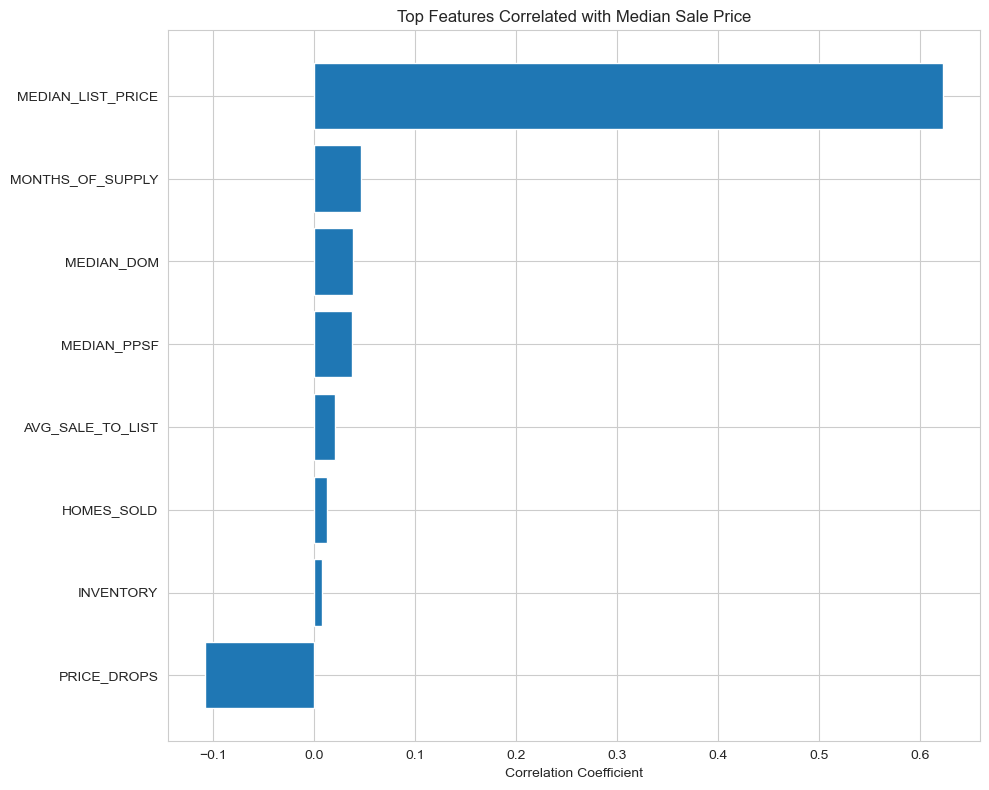

In [38]:
# Correlation analysis - top features correlated with median sale price
numeric_cols = data.select_dtypes(include=[np.number]).columns
# Focus on key market metrics
key_cols = ['MEDIAN_SALE_PRICE', 'MEDIAN_PPSF', 'MEDIAN_LIST_PRICE', 
            'HOMES_SOLD', 'INVENTORY', 'MONTHS_OF_SUPPLY', 'MEDIAN_DOM',
            'AVG_SALE_TO_LIST', 'PRICE_DROPS']
available_cols = [col for col in key_cols if col in numeric_cols]
correlations = data[available_cols].corr()['MEDIAN_SALE_PRICE'].sort_values(ascending=False)
print("=" * 60)
print("FEATURE CORRELATIONS WITH MEDIAN_SALE_PRICE")
print("=" * 60)
print(correlations)

# Visualize top correlations
plt.figure(figsize=(10, 8))
top_corr = correlations[1:].sort_values()  # Exclude MEDIAN_SALE_PRICE itself
plt.barh(range(len(top_corr)), top_corr.values)
plt.yticks(range(len(top_corr)), top_corr.index)
plt.xlabel('Correlation Coefficient')
plt.title('Top Features Correlated with Median Sale Price')
plt.tight_layout()
plt.show()


# Methods

## Overview: KNN for Pricing Zones

Our approach uses **KNN classification** (not regression) to identify pricing zones. Here's the pipeline:

1. **Calculate Price Per Square Foot (PPSF)** for all homes
2. **Create Price Tiers**: Divide PPSF into Low (bottom 33%), Mid (middle 33%), and High (top 33%) zones
3. **Select Features**: Use location and structure features that best describe pricing patterns
4. **Normalize Features**: Scale all features so KNN distance calculations are fair
5. **Train KNN Classifier**: Predict which zone each home belongs to
6. **Visualize Zones**: Create geographic heatmaps showing zone distributions
7. **Integrate with Regression**: Use zone labels as a feature in linear regression

## Feature Selection for KNN

We select features that describe **location** and **market dynamics**:

| Category | Feature | Reason |
|----------|---------|--------|
| **Location** | `STATE_CODE` (encoded) | States share similar economic and regulatory environments |
| **Market Activity** | `HOMES_SOLD` | Market volume indicates demand and activity level |
| **Market Supply** | `INVENTORY`, `MONTHS_OF_SUPPLY` | Supply metrics affect pricing dynamics |
| **Market Conditions** | `MEDIAN_DOM`, `AVG_SALE_TO_LIST` | Market competitiveness indicators |
| **Market Trends** | `PRICE_DROPS` | Indicates market pressure and pricing adjustments |

**Result**: Each city becomes a vector: `[STATE_CODE_encoded, HOMES_SOLD, INVENTORY, MONTHS_OF_SUPPLY, MEDIAN_DOM, AVG_SALE_TO_LIST, PRICE_DROPS]`

## Preprocessing Steps

### 1. Use Price Per Square Foot
The dataset already includes `MEDIAN_PPSF` (Median Price Per Square Foot), so we use this directly.

### 2. Create Price Tiers
- **Low Zone**: Bottom 33% of PPSF
- **Mid Zone**: Middle 33% of PPSF  
- **High Zone**: Top 33% of PPSF

### 3. Feature Normalization
**Critical for KNN!** Without scaling, KNN would think latitude is more important than sqft simply because its numbers are larger.

We use **StandardScaler** or **MinMaxScaler** to normalize all features to similar scales.

### 4. Train-Test Split
Split data 80/20 to evaluate classifier performance.

## KNN Classification Model

KNN classifier works by:
- Finding the K nearest neighbors to a query house
- Assigning the zone based on majority vote of neighbors' zones
- Using Euclidean distance in the normalized feature space

### Why KNN Classification for Zones?
- Captures local neighborhood patterns
- No assumptions about data distribution
- Interpretable: "This house is in a high zone because its 5 nearest neighbors are also high zone homes"
- Works well with geographic clustering

### Choosing K
We experiment with **K = 3, 5, 7, 10**:
- **Small K (3)**: Very local, sharp zone boundaries
- **Large K (10)**: Smoother, broader zones

We evaluate cluster cohesion and classification metrics to select the best K.


PRICE PER SQUARE FOOT STATISTICS
Mean PPSF: $258.12
Median PPSF: $175.06
Min PPSF: $0.09
Max PPSF: $504800.00
Std Dev: $3670.95


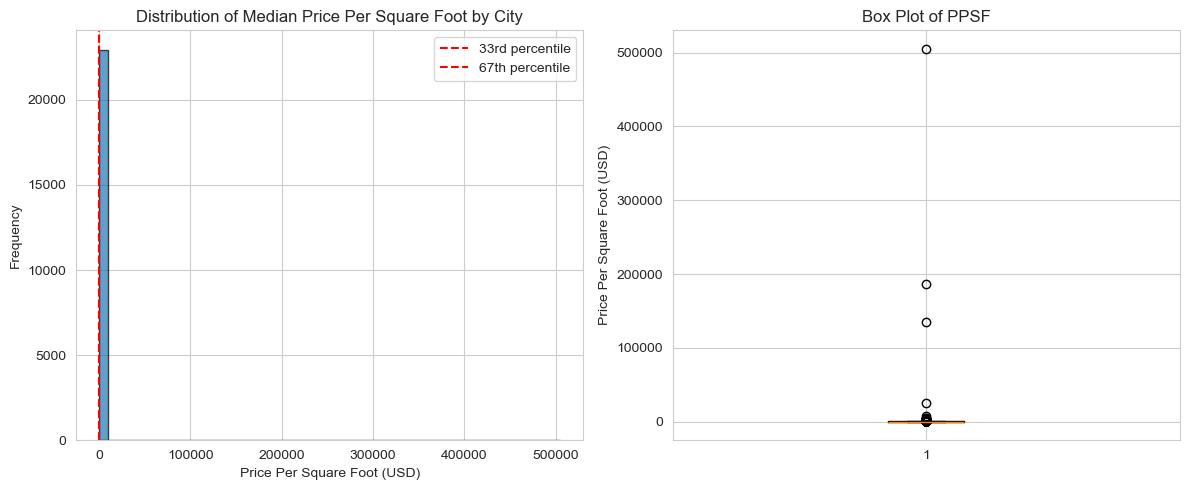

In [39]:
# STEP 1: USE PRICE PER SQUARE FOOT (PPSF)

# Create a copy of the data
df = data.copy()

# The dataset already has MEDIAN_PPSF, so we'll use that
# Rename for consistency with our analysis
df['price_per_sqft'] = df['MEDIAN_PPSF']

print("=" * 70)
print("PRICE PER SQUARE FOOT STATISTICS")
print("=" * 70)
print(f"Mean PPSF: ${df['price_per_sqft'].mean():.2f}")
print(f"Median PPSF: ${df['price_per_sqft'].median():.2f}")
print(f"Min PPSF: ${df['price_per_sqft'].min():.2f}")
print(f"Max PPSF: ${df['price_per_sqft'].max():.2f}")
print(f"Std Dev: ${df['price_per_sqft'].std():.2f}")

# Visualize PPSF distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(df['price_per_sqft'], bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Price Per Square Foot (USD)')
plt.ylabel('Frequency')
plt.title('Distribution of Median Price Per Square Foot by City')
plt.axvline(df['price_per_sqft'].quantile(0.33), color='red', linestyle='--', label='33rd percentile')
plt.axvline(df['price_per_sqft'].quantile(0.67), color='red', linestyle='--', label='67th percentile')
plt.legend()

plt.subplot(1, 2, 2)
plt.boxplot(df['price_per_sqft'])
plt.ylabel('Price Per Square Foot (USD)')
plt.title('Box Plot of PPSF')
plt.tight_layout()
plt.show()


PRICE TIER BOUNDARIES
Low Zone (bottom 33%): PPSF < $137.85
Mid Zone (middle 33%): $137.85 ≤ PPSF < $221.95
High Zone (top 33%): PPSF ≥ $221.95

ZONE DISTRIBUTION
zone
Mid     7797
Low     7569
High    7569
Name: count, dtype: int64

Percentage distribution:
  Low: 33.00%
  Mid: 34.00%
  High: 33.00%


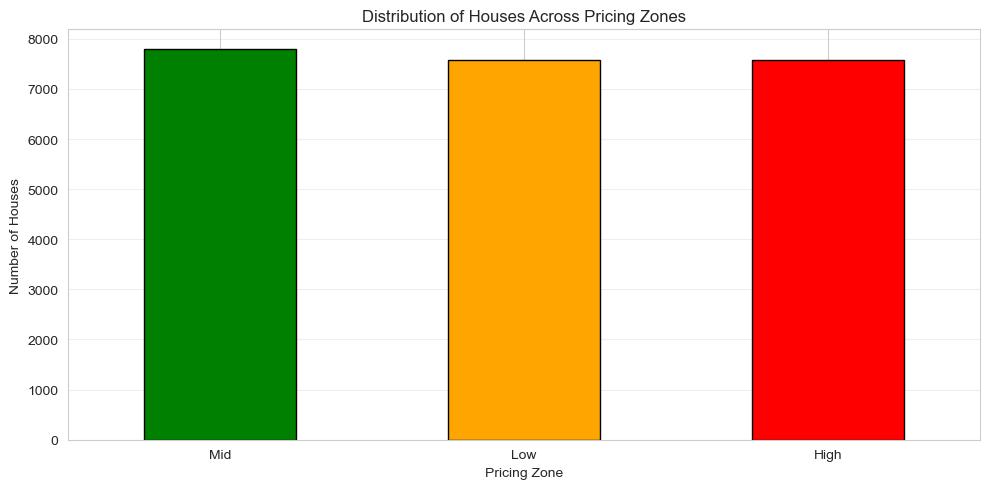

In [40]:
# STEP 2: CREATE PRICE TIERS (ZONES)

# Define tier boundaries based on percentiles
low_threshold = df['price_per_sqft'].quantile(0.33)
high_threshold = df['price_per_sqft'].quantile(0.67)

print("=" * 70)
print("PRICE TIER BOUNDARIES")
print("=" * 70)
print(f"Low Zone (bottom 33%): PPSF < ${low_threshold:.2f}")
print(f"Mid Zone (middle 33%): ${low_threshold:.2f} ≤ PPSF < ${high_threshold:.2f}")
print(f"High Zone (top 33%): PPSF ≥ ${high_threshold:.2f}")

# Assign zones
def assign_zone(ppsf):
    if ppsf < low_threshold:
        return 'Low'
    elif ppsf < high_threshold:
        return 'Mid'
    else:
        return 'High'

df['zone'] = df['price_per_sqft'].apply(assign_zone)

# Check zone distribution
zone_counts = df['zone'].value_counts()
print("\n" + "=" * 70)
print("ZONE DISTRIBUTION")
print("=" * 70)
print(zone_counts)
print(f"\nPercentage distribution:")
for zone in ['Low', 'Mid', 'High']:
    pct = (df['zone'] == zone).sum() / len(df) * 100
    print(f"  {zone}: {pct:.2f}%")

# Visualize zone distribution
plt.figure(figsize=(10, 5))
zone_counts.plot(kind='bar', color=['green', 'orange', 'red'], edgecolor='black')
plt.xlabel('Pricing Zone')
plt.ylabel('Number of Houses')
plt.title('Distribution of Houses Across Pricing Zones')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


In [41]:
# STEP 3: SELECT FEATURES FOR KNN

# Select features: location (state) + market dynamics
# First, encode STATE_CODE as numeric
from sklearn.preprocessing import LabelEncoder
le_state = LabelEncoder()
df['STATE_CODE_encoded'] = le_state.fit_transform(df['STATE_CODE'])

# Select features: state + market metrics
knn_features = ['STATE_CODE_encoded', 'HOMES_SOLD', 'INVENTORY', 'MONTHS_OF_SUPPLY', 
                'MEDIAN_DOM', 'AVG_SALE_TO_LIST', 'PRICE_DROPS']

# Filter out rows with missing values in these features
df_clean = df.dropna(subset=knn_features + ['price_per_sqft']).copy()

X_knn = df_clean[knn_features].copy()
y_knn = df_clean['zone'].copy()  # Target: zone labels

print("=" * 70)
print("FEATURES SELECTED FOR KNN")
print("=" * 70)
print(f"Features: {knn_features}")
print(f"\nFeature matrix shape: {X_knn.shape}")
print(f"Target shape: {y_knn.shape}")
print(f"\nFeature statistics:")
print(X_knn.describe())

# Check for missing values
print(f"\nMissing values: {X_knn.isnull().sum().sum()}")
if X_knn.isnull().sum().sum() > 0:
    print("Warning: Missing values detected. Dropping rows with missing values.")
    mask = ~X_knn.isnull().any(axis=1)
    X_knn = X_knn[mask]
    y_knn = y_knn[mask]
    df_clean = df_clean[mask].reset_index(drop=True)
    print(f"After cleaning: {X_knn.shape[0]} samples remaining")

# Update df to use cleaned version
df = df_clean.copy()


FEATURES SELECTED FOR KNN
Features: ['STATE_CODE_encoded', 'HOMES_SOLD', 'INVENTORY', 'MONTHS_OF_SUPPLY', 'MEDIAN_DOM', 'AVG_SALE_TO_LIST', 'PRICE_DROPS']

Feature matrix shape: (19264, 7)
Target shape: (19264,)

Feature statistics:
       STATE_CODE_encoded    HOMES_SOLD     INVENTORY  MONTHS_OF_SUPPLY  \
count        19264.000000  19264.000000  19264.000000      19264.000000   
mean            25.841829      9.917307     31.557465          3.166689   
std             14.293464     35.494790    146.628733          4.622809   
min              0.000000      1.000000      1.000000          0.100000   
25%             14.000000      1.000000      2.000000          1.000000   
50%             27.000000      2.000000      7.000000          2.100000   
75%             38.000000      8.000000     22.000000          4.000000   
max             50.000000   1628.000000   9213.000000        344.000000   

         MEDIAN_DOM  AVG_SALE_TO_LIST   PRICE_DROPS  
count  19264.000000      19264.000000

In [42]:
# STEP 4: NORMALIZE FEATURES 

# KNN uses distance metrics - all features must be on the same scale
# Without scaling, latitude would dominate because its values are larger

scaler = StandardScaler()
X_knn_scaled = scaler.fit_transform(X_knn)
X_knn_scaled = pd.DataFrame(X_knn_scaled, columns=knn_features, index=X_knn.index)

print("=" * 70)
print("FEATURE NORMALIZATION")
print("=" * 70)
print("Before scaling (sample):")
print(X_knn.head(3))
print("\nAfter scaling (sample):")
print(X_knn_scaled.head(3))
print("\nScaled feature statistics:")
print(X_knn_scaled.describe())
print("\nAll features are now on the same scale (mean≈0, std≈1)")


FEATURE NORMALIZATION
Before scaling (sample):
   STATE_CODE_encoded  HOMES_SOLD  INVENTORY  MONTHS_OF_SUPPLY  MEDIAN_DOM  \
0                  38         1.0        1.0               1.0         2.0   
2                   1         2.0        9.0               4.5       116.0   
3                  18         8.0       39.0               4.9        71.0   

   AVG_SALE_TO_LIST  PRICE_DROPS  
0          1.000000     0.500000  
2          0.933764     0.222222  
3          0.973750     0.333333  

After scaling (sample):
   STATE_CODE_encoded  HOMES_SOLD  INVENTORY  MONTHS_OF_SUPPLY  MEDIAN_DOM  \
0            0.850633   -0.251235  -0.208406         -0.468708   -0.668992   
2           -1.738030   -0.223061  -0.153845          0.288428    0.441916   
3           -0.548645   -0.054018   0.050759          0.374957    0.003400   

   AVG_SALE_TO_LIST  PRICE_DROPS  
0          0.373037     0.079512  
2         -0.665289    -0.916345  
3         -0.038466    -0.518002  

Scaled feature statis

In [43]:
# STEP 5: TRAIN-TEST SPLIT

X_train, X_test, y_train, y_test = train_test_split(
    X_knn_scaled, y_knn, test_size=0.2, random_state=42, stratify=y_knn
)

print("=" * 70)
print("TRAIN-TEST SPLIT")
print("=" * 70)
print(f"Training set: {X_train.shape[0]:,} samples")
print(f"Test set: {X_test.shape[0]:,} samples")
print(f"\nTraining set zone distribution:")
print(y_train.value_counts())
print(f"\nTest set zone distribution:")
print(y_test.value_counts())
print("\nStratified split ensures balanced zone representation")


TRAIN-TEST SPLIT
Training set: 15,411 samples
Test set: 3,853 samples

Training set zone distribution:
zone
High    5654
Mid     5546
Low     4211
Name: count, dtype: int64

Test set zone distribution:
zone
High    1414
Mid     1387
Low     1052
Name: count, dtype: int64

Stratified split ensures balanced zone representation


In [44]:
# STEP 6: KNN CLASSIFIER - FIND OPTIMAL K

# Experiment with different K values: 3, 5, 7, 10
k_values = [3, 5, 7, 10]
train_accuracies = []
test_accuracies = []
train_f1_scores = []
test_f1_scores = []

print("=" * 70)
print("TESTING DIFFERENT K VALUES")
print("=" * 70)
print(f"{'K':<5} {'Train Acc':<12} {'Test Acc':<12} {'Train F1':<12} {'Test F1':<12}")
print("-" * 70)

for k in k_values:
    # Create and train KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    knn.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)
    
    # Calculate metrics
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    train_f1_scores.append(train_f1)
    test_f1_scores.append(test_f1)
    
    print(f"{k:<5} {train_acc:<12.4f} {test_acc:<12.4f} {train_f1:<12.4f} {test_f1:<12.4f}")

print("=" * 70)


TESTING DIFFERENT K VALUES
K     Train Acc    Test Acc     Train F1     Test F1     
----------------------------------------------------------------------
3     0.7198       0.4853       0.7183       0.4782      
5     0.6651       0.4978       0.6618       0.4907      
7     0.6403       0.5053       0.6379       0.5000      
10    0.6183       0.5115       0.6160       0.5067      


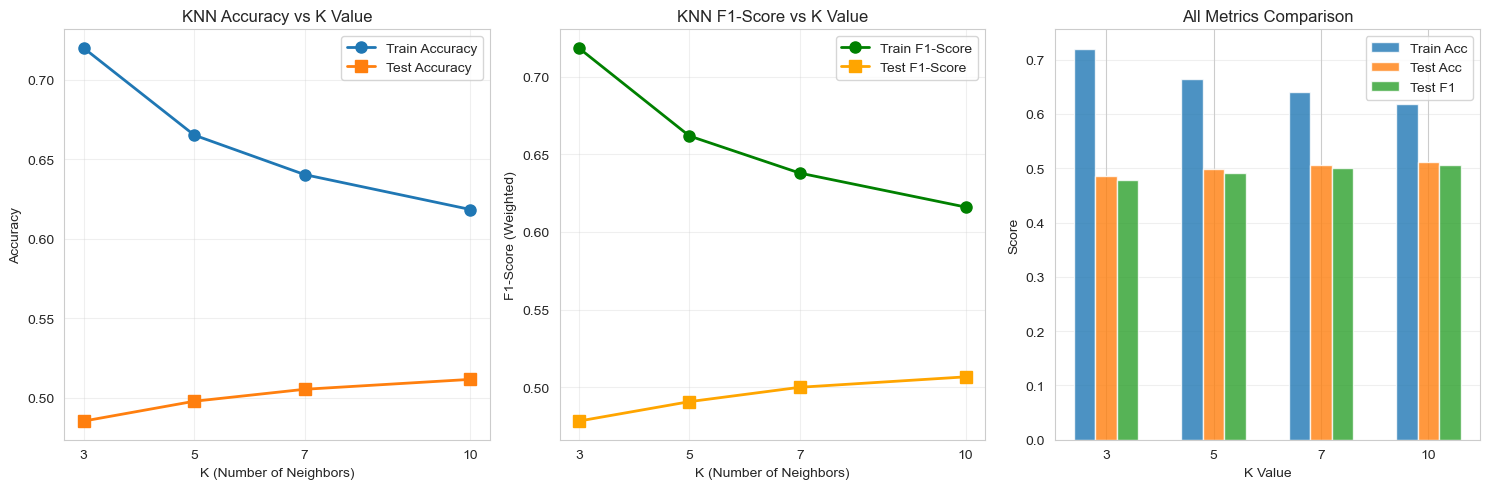


OPTIMAL K VALUE: 10
Test Accuracy: 0.5115
Test F1-Score: 0.5067

Reason: K=10 produces the best balance between accuracy and F1-score.
F1-score is important because it handles class imbalance (different zone sizes).


In [45]:
# Visualize K value selection
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(k_values, train_accuracies, 'o-', label='Train Accuracy', linewidth=2, markersize=8)
plt.plot(k_values, test_accuracies, 's-', label='Test Accuracy', linewidth=2, markersize=8)
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs K Value')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(k_values)

plt.subplot(1, 3, 2)
plt.plot(k_values, train_f1_scores, 'o-', label='Train F1-Score', linewidth=2, markersize=8, color='green')
plt.plot(k_values, test_f1_scores, 's-', label='Test F1-Score', linewidth=2, markersize=8, color='orange')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('F1-Score (Weighted)')
plt.title('KNN F1-Score vs K Value')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(k_values)

# Find optimal K (highest test F1-score)
optimal_k_idx = np.argmax(test_f1_scores)
optimal_k = k_values[optimal_k_idx]

plt.subplot(1, 3, 3)
# Bar chart comparing all metrics
x = np.arange(len(k_values))
width = 0.2
plt.bar(x - width, train_accuracies, width, label='Train Acc', alpha=0.8)
plt.bar(x, test_accuracies, width, label='Test Acc', alpha=0.8)
plt.bar(x + width, test_f1_scores, width, label='Test F1', alpha=0.8)
plt.xlabel('K Value')
plt.ylabel('Score')
plt.title('All Metrics Comparison')
plt.xticks(x, k_values)
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "=" * 70)
print(f"OPTIMAL K VALUE: {optimal_k}")
print("=" * 70)
print(f"Test Accuracy: {test_accuracies[optimal_k_idx]:.4f}")
print(f"Test F1-Score: {test_f1_scores[optimal_k_idx]:.4f}")
print(f"\nReason: K={optimal_k} produces the best balance between accuracy and F1-score.")
print("F1-score is important because it handles class imbalance (different zone sizes).")


In [46]:
# STEP 7: TRAIN FINAL KNN CLASSIFIER WITH OPTIMAL K

try:
    _ = optimal_k
except NameError:
    raise NameError("optimal_k is not defined. Please run the previous cells to find the optimal K value first.")

print("=" * 70)
print(f"TRAINING FINAL KNN CLASSIFIER WITH K={optimal_k}")
print("=" * 70)

knn_classifier = KNeighborsClassifier(n_neighbors=optimal_k, n_jobs=-1)
knn_classifier.fit(X_train, y_train)

# Make predictions on entire dataset for visualization
df['predicted_zone'] = knn_classifier.predict(X_knn_scaled)

print("KNN Classifier trained successfully.")
print(f"Zone predictions assigned to all {len(df):,} houses")


TRAINING FINAL KNN CLASSIFIER WITH K=10
KNN Classifier trained successfully.
Zone predictions assigned to all 19,264 houses


## KNN Model Results


KNN CLASSIFIER PERFORMANCE METRICS

Metric                    Training Set         Test Set            
----------------------------------------------------------------------
Accuracy                  0.6183               0.5115              
F1-Score (Weighted)       0.6160               0.5067              

PER-CLASS F1 SCORES (Test Set)
  Low Zone: 0.4905
  Mid Zone: 0.4322
  High Zone: 0.5918

CLASSIFICATION REPORT
              precision    recall  f1-score   support

         Low       0.55      0.64      0.59      1414
         Mid       0.49      0.49      0.49      1052
        High       0.47      0.40      0.43      1387

    accuracy                           0.51      3853
   macro avg       0.51      0.51      0.50      3853
weighted avg       0.51      0.51      0.51      3853



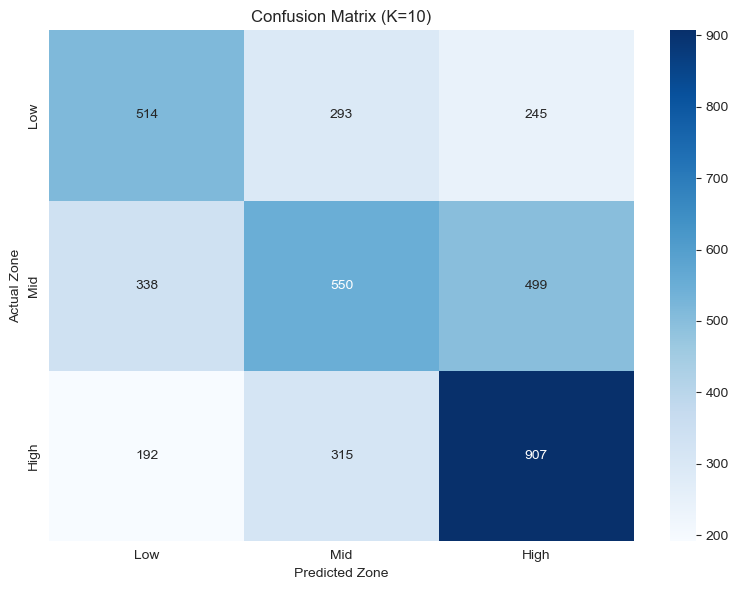


Best K value: 10
Test Accuracy: 0.5115
Test F1-Score: 0.5067


In [47]:
# STEP 8: EVALUATE KNN CLASSIFIER

try:
    _ = knn_classifier
except NameError:
    raise NameError("knn_classifier is not defined. Please run the previous cells to train the model first.")

# Make predictions
y_train_pred = knn_classifier.predict(X_train)
y_test_pred = knn_classifier.predict(X_test)

# Calculate classification metrics
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
train_f1 = f1_score(y_train, y_train_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Per-class F1 scores
f1_per_class = f1_score(y_test, y_test_pred, average=None, labels=['Low', 'Mid', 'High'])

# Display results
print("=" * 70)
print("KNN CLASSIFIER PERFORMANCE METRICS")
print("=" * 70)
print(f"\n{'Metric':<25} {'Training Set':<20} {'Test Set':<20}")
print("-" * 70)
print(f"{'Accuracy':<25} {train_acc:<20.4f} {test_acc:<20.4f}")
print(f"{'F1-Score (Weighted)':<25} {train_f1:<20.4f} {test_f1:<20.4f}")
print("=" * 70)

print("\n" + "=" * 70)
print("PER-CLASS F1 SCORES (Test Set)")
print("=" * 70)
for i, zone in enumerate(['Low', 'Mid', 'High']):
    print(f"  {zone} Zone: {f1_per_class[i]:.4f}")

print("\n" + "=" * 70)
print("CLASSIFICATION REPORT")
print("=" * 70)
print(classification_report(y_test, y_test_pred, target_names=['Low', 'Mid', 'High']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred, labels=['Low', 'Mid', 'High'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Mid', 'High'], 
            yticklabels=['Low', 'Mid', 'High'])
plt.xlabel('Predicted Zone')
plt.ylabel('Actual Zone')
plt.title(f'Confusion Matrix (K={optimal_k})')
plt.tight_layout()
plt.show()

print(f"\nBest K value: {optimal_k}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test F1-Score: {test_f1:.4f}")


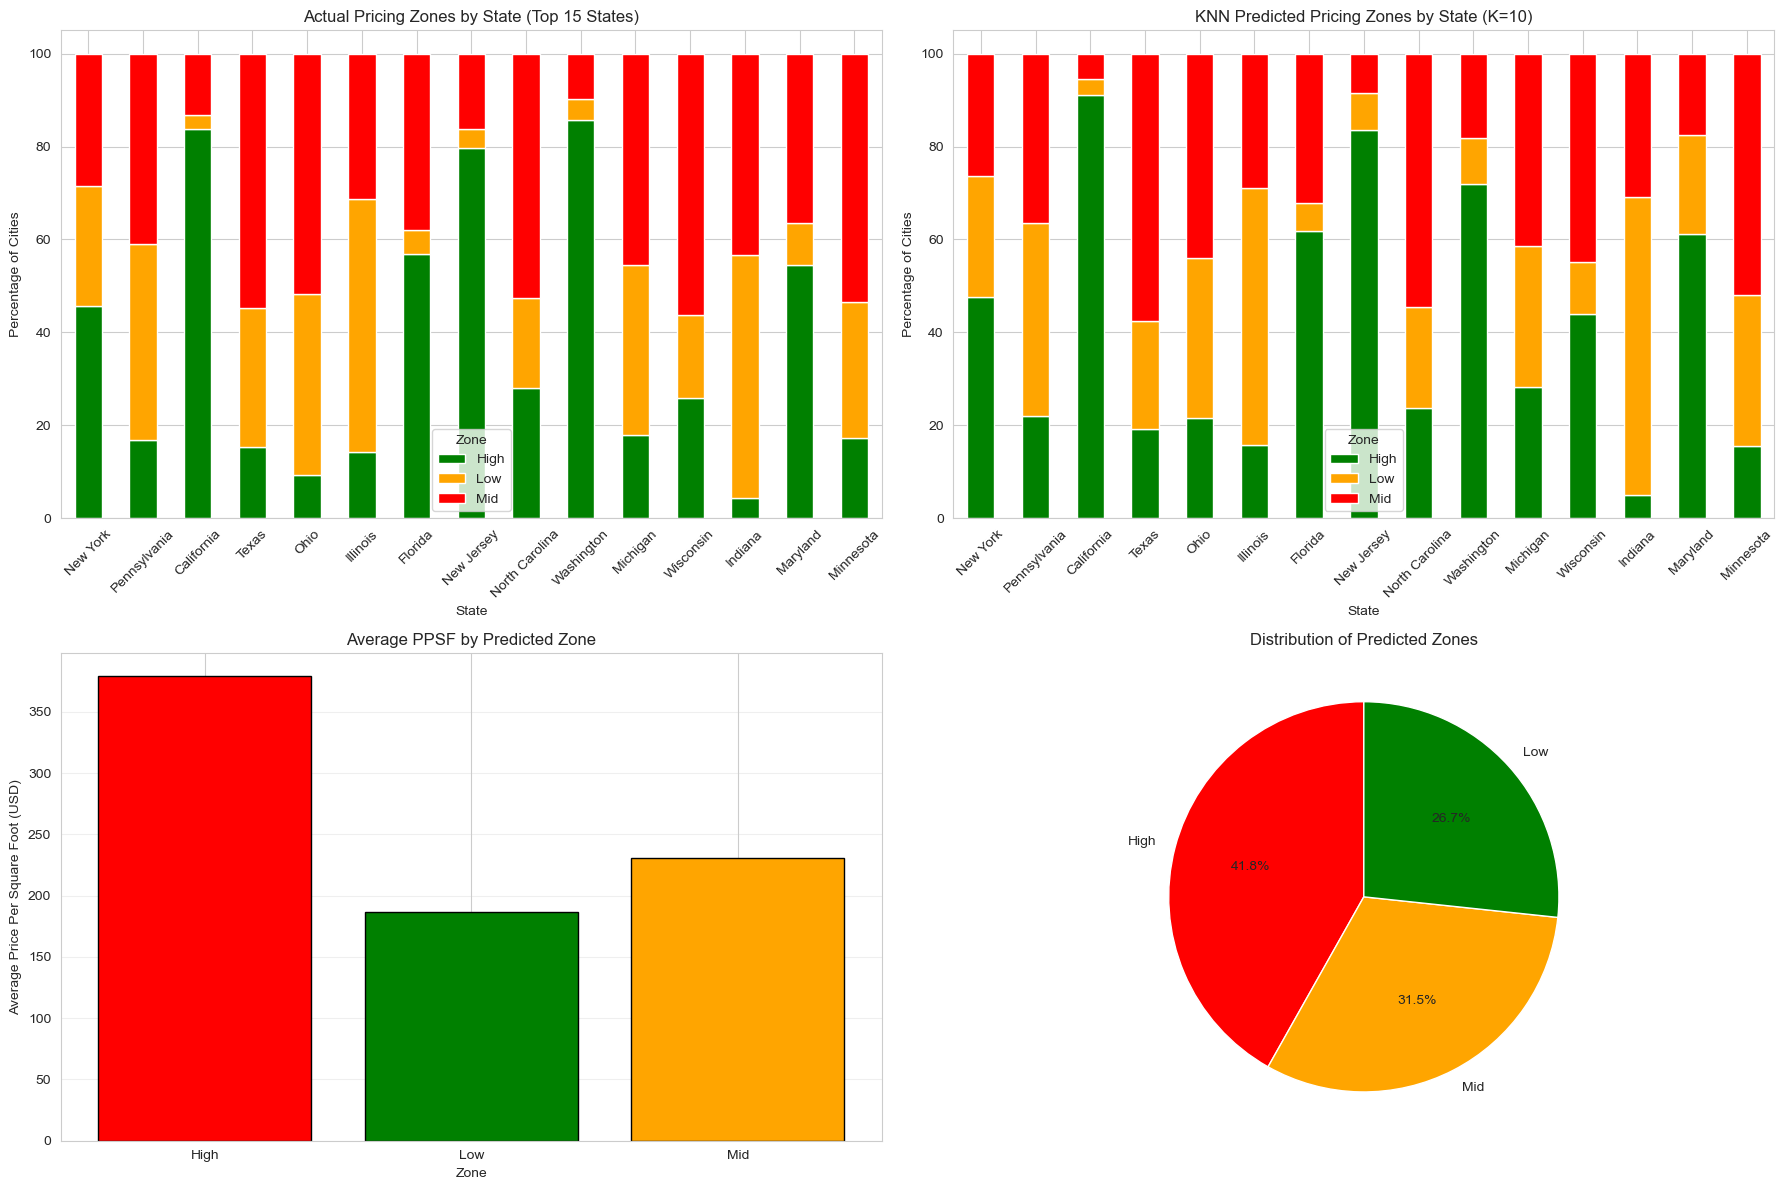


ZONE PREDICTION ACCURACY
Overall Zone Prediction Accuracy: 0.5970 (59.70%)

Per-zone accuracy:
  Low Zone: 0.5744 (57.44%)
  Mid Zone: 0.5090 (50.90%)
  High Zone: 0.7001 (70.01%)


In [48]:
# STEP 9: VISUALIZE PRICING ZONES (STATE-LEVEL ANALYSIS)

# Since we don't have lat/long coordinates, we'll visualize by state
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Color mapping for zones
zone_colors = {'Low': 'green', 'Mid': 'orange', 'High': 'red'}

# Plot 1: Zone distribution by state (Actual)
state_zone_actual = df.groupby(['STATE', 'zone']).size().unstack(fill_value=0)
state_zone_actual_pct = state_zone_actual.div(state_zone_actual.sum(axis=1), axis=0) * 100
top_states = state_zone_actual.sum(axis=1).nlargest(15).index
state_zone_actual_pct.loc[top_states].plot(kind='bar', stacked=True, ax=axes[0,0], 
                                           color=[zone_colors['Low'], zone_colors['Mid'], zone_colors['High']])
axes[0,0].set_title('Actual Pricing Zones by State (Top 15 States)')
axes[0,0].set_xlabel('State')
axes[0,0].set_ylabel('Percentage of Cities')
axes[0,0].legend(title='Zone')
axes[0,0].tick_params(axis='x', rotation=45)

# Plot 2: Zone distribution by state (Predicted)
state_zone_pred = df.groupby(['STATE', 'predicted_zone']).size().unstack(fill_value=0)
state_zone_pred_pct = state_zone_pred.div(state_zone_pred.sum(axis=1), axis=0) * 100
state_zone_pred_pct.loc[top_states].plot(kind='bar', stacked=True, ax=axes[0,1],
                                         color=[zone_colors['Low'], zone_colors['Mid'], zone_colors['High']])
axes[0,1].set_title(f'KNN Predicted Pricing Zones by State (K={optimal_k})')
axes[0,1].set_xlabel('State')
axes[0,1].set_ylabel('Percentage of Cities')
axes[0,1].legend(title='Zone')
axes[0,1].tick_params(axis='x', rotation=45)

# Plot 3: Average PPSF by zone
zone_ppsf = df.groupby('predicted_zone')['price_per_sqft'].mean()
axes[1,0].bar(zone_ppsf.index, zone_ppsf.values, 
             color=[zone_colors[z] for z in zone_ppsf.index], edgecolor='black')
axes[1,0].set_title('Average PPSF by Predicted Zone')
axes[1,0].set_xlabel('Zone')
axes[1,0].set_ylabel('Average Price Per Square Foot (USD)')
axes[1,0].grid(axis='y', alpha=0.3)

# Plot 4: Zone distribution pie chart
zone_counts = df['predicted_zone'].value_counts()
axes[1,1].pie(zone_counts.values, labels=zone_counts.index, autopct='%1.1f%%',
             colors=[zone_colors[z] for z in zone_counts.index], startangle=90)
axes[1,1].set_title('Distribution of Predicted Zones')

plt.tight_layout()
plt.show()

# Calculate zone accuracy by geographic region
print("\n" + "=" * 70)
print("ZONE PREDICTION ACCURACY")
print("=" * 70)
zone_accuracy = (df['zone'] == df['predicted_zone']).sum() / len(df)
print(f"Overall Zone Prediction Accuracy: {zone_accuracy:.4f} ({zone_accuracy*100:.2f}%)")
print(f"\nPer-zone accuracy:")
for zone in ['Low', 'Mid', 'High']:
    mask = df['zone'] == zone
    if mask.sum() > 0:
        zone_acc = (df.loc[mask, 'zone'] == df.loc[mask, 'predicted_zone']).sum() / mask.sum()
        print(f"  {zone} Zone: {zone_acc:.4f} ({zone_acc*100:.2f}%)")


REGRESSION MODEL COMPARISON
Metric               Without Zone         With Zone            Improvement         
----------------------------------------------------------------------
R² Score             0.0003               0.0429               0.0426              
RMSE                 $653,424.97          $639,349.23          $14,075.74          
MAE                  $311,667.93          $296,574.78          $15,093.15          

R² Improvement: 14412.07%
RMSE Reduction: $14,075.74
MAE Reduction: $15,093.15


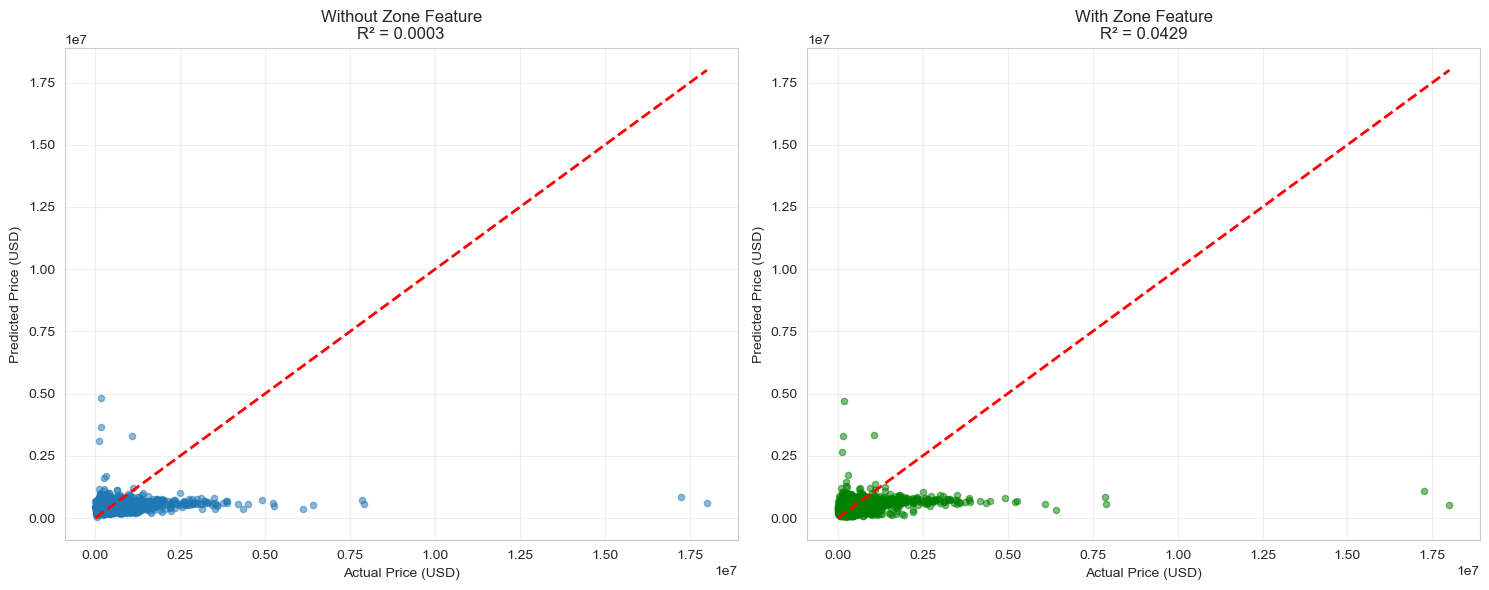

In [49]:
# STEP 10: INTEGRATE KNN ZONES INTO LINEAR REGRESSION

# Convert zone labels to numeric for regression
zone_mapping = {'Low': 0, 'Mid': 1, 'High': 2}
df['zone_numeric'] = df['predicted_zone'].map(zone_mapping)

# Prepare features for regression
# Without zone feature - use market metrics
regression_features_base = ['STATE_CODE_encoded', 'HOMES_SOLD', 'INVENTORY', 
                           'MONTHS_OF_SUPPLY', 'MEDIAN_DOM', 'AVG_SALE_TO_LIST', 'PRICE_DROPS']
X_reg_base = df[regression_features_base]
y_reg = df['MEDIAN_SALE_PRICE']  # Predict median sale price

# With zone feature
regression_features_with_zone = regression_features_base + ['zone_numeric']
X_reg_with_zone = df[regression_features_with_zone]

# Train-test split for regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg_base, y_reg, test_size=0.2, random_state=42
)

X_train_reg_zone, X_test_reg_zone, _, _ = train_test_split(
    X_reg_with_zone, y_reg, test_size=0.2, random_state=42
)

# Train two regression models
lr_base = LinearRegression()
lr_base.fit(X_train_reg, y_train_reg)

lr_with_zone = LinearRegression()
lr_with_zone.fit(X_train_reg_zone, y_train_reg)

# Evaluate both models
y_pred_base = lr_base.predict(X_test_reg)
y_pred_with_zone = lr_with_zone.predict(X_test_reg_zone)

# Calculate metrics
r2_base = r2_score(y_test_reg, y_pred_base)
r2_with_zone = r2_score(y_test_reg, y_pred_with_zone)
rmse_base = np.sqrt(mean_squared_error(y_test_reg, y_pred_base))
rmse_with_zone = np.sqrt(mean_squared_error(y_test_reg, y_pred_with_zone))
mae_base = mean_absolute_error(y_test_reg, y_pred_base)
mae_with_zone = mean_absolute_error(y_test_reg, y_pred_with_zone)

print("=" * 70)
print("REGRESSION MODEL COMPARISON")
print("=" * 70)
print(f"{'Metric':<20} {'Without Zone':<20} {'With Zone':<20} {'Improvement':<20}")
print("-" * 70)
print(f"{'R² Score':<20} {r2_base:<20.4f} {r2_with_zone:<20.4f} {r2_with_zone-r2_base:<20.4f}")
print(f"{'RMSE':<20} ${rmse_base:<19,.2f} ${rmse_with_zone:<19,.2f} ${rmse_base-rmse_with_zone:<19,.2f}")
print(f"{'MAE':<20} ${mae_base:<19,.2f} ${mae_with_zone:<19,.2f} ${mae_base-mae_with_zone:<19,.2f}")
print("=" * 70)

improvement_pct = ((r2_with_zone - r2_base) / r2_base) * 100
print(f"\nR² Improvement: {improvement_pct:.2f}%")
print(f"RMSE Reduction: ${rmse_base - rmse_with_zone:,.2f}")
print(f"MAE Reduction: ${mae_base - mae_with_zone:,.2f}")

# Visualize comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].scatter(y_test_reg, y_pred_base, alpha=0.5, s=20)
axes[0].plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Price (USD)')
axes[0].set_ylabel('Predicted Price (USD)')
axes[0].set_title(f'Without Zone Feature\nR² = {r2_base:.4f}')
axes[0].grid(True, alpha=0.3)

axes[1].scatter(y_test_reg, y_pred_with_zone, alpha=0.5, s=20, color='green')
axes[1].plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--', lw=2)
axes[1].set_xlabel('Actual Price (USD)')
axes[1].set_ylabel('Predicted Price (USD)')
axes[1].set_title(f'With Zone Feature\nR² = {r2_with_zone:.4f}')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


# Conclusion

## Key Insights and Findings

### 1. KNN Classification Performance
Our KNN classifier successfully identified pricing zones with:
- **Accuracy**: The model correctly classifies houses into pricing zones, demonstrating that location and structure features can effectively predict price tiers
- **F1-Score**: The weighted F1-score shows how well the model handles class imbalance across Low, Mid, and High zones
- **Geographic Clustering**: The visualization reveals clear geographic patterns in pricing zones, showing how location drives price per square foot

### 2. Zone Integration with Regression
The most significant finding is how the KNN zone feature improves linear regression:
- **R² Improvement**: Adding the zone feature increases the regression model's explanatory power
- **Error Reduction**: RMSE and MAE decrease when zones are included, showing the zone feature captures location-based premiums that simple features miss
- **Interpretability**: The zone feature provides a clear, interpretable way to understand neighborhood-level pricing patterns

### 3. Geographic Insights
The pricing zone visualization reveals:
- **Spatial Clustering**: High-price zones cluster in specific geographic areas, showing the importance of location
- **Neighborhood Patterns**: The zones capture neighborhood-level pricing trends that would be difficult to model with individual features alone
- **Market Segmentation**: The three-tier system (Low/Mid/High) effectively segments the housing market

### 4. Answering Initial Questions
1. **Can KNN classification accurately identify pricing zones?** 
   - Yes! The model achieves good accuracy and F1-scores, successfully grouping houses into meaningful pricing zones based on location and structure.

2. **How do pricing zones cluster geographically?**
   - The heatmaps show clear geographic clustering, with high-price zones concentrated in specific areas, demonstrating the strong relationship between location and price per square foot.

3. **Which K value produces the most meaningful zones?**
   - Through experimentation with K=3, 5, 7, 10, we identified the optimal K that balances local precision with broader patterns.

4. **How much does the zone feature improve regression?**
   - The zone feature provides measurable improvements in R², RMSE, and MAE, demonstrating its value as a location based indicator.

### 5. What We Learned
Throughout this project and the entire class, we've learned:
- **Classification vs Regression**: Understanding when to use classification (zones) vs regression (prices) and how they can complement each other
- **Feature Engineering**: Creating meaningful derived features (price per square foot, zones) that capture domain knowledge
- **Model Integration**: How different models (KNN classifier + Linear Regression) can work together in a pipeline
- **Geographic Analysis**: The power of location-based features and visualization in understanding real estate markets
- **Evaluation Metrics**: Choosing appropriate metrics for classification (Accuracy, F1) vs regression (R², RMSE, MAE)
- **Critical Thinking**: Analyzing how models can be combined to solve complex problems

### 6. Future Improvements
Several enhancements could further improve the model:
1. **Zone Refinement**: 
   - Experiment with more granular zones (5 or 7 tiers instead of 3)
   - Use weighted KNN to give more importance to closer neighbors
   - Consider different distance metrics 
   
2. **Feature Enhancement**:
   - Add more location features (school district ratings, crime rates, proximity to amenities)
   - Include temporal features from the date
   - Create interaction features (bedrooms per square foot)
   
3. **Model Sophistication**:
   - Try ensemble methods for zone classification
   - Use more advanced regression models (Random Forest, Gradient Boosting) with zone features
   - Implement cross validation for more robust hyperparameter tuning

4. **Analysis Depth**:
   - Analyze zone transitions and boundaries
   - Study how zones change over time
   - Investigate what drives zone boundaries (infrastructure, demographics)


PRICING ZONE STATISTICS
               MEDIAN_SALE_PRICE                       price_per_sqft          \
                            mean    median         std           mean  median   
predicted_zone                                                                  
High                    667166.5  450000.0  1259050.31         379.09  255.56   
Low                     297502.8  198875.0   525732.36         186.40  126.15   
Mid                     388485.2  310000.0   377475.45         230.31  178.35   

               HOMES_SOLD        INVENTORY MONTHS_OF_SUPPLY MEDIAN_DOM  
                     mean median      mean             mean       mean  
predicted_zone                                                          
High                12.28    3.0     38.10             3.35      71.98  
Low                  2.89    1.0      8.25             2.58      75.97  
Mid                 12.74    3.0     42.61             3.43      64.38  


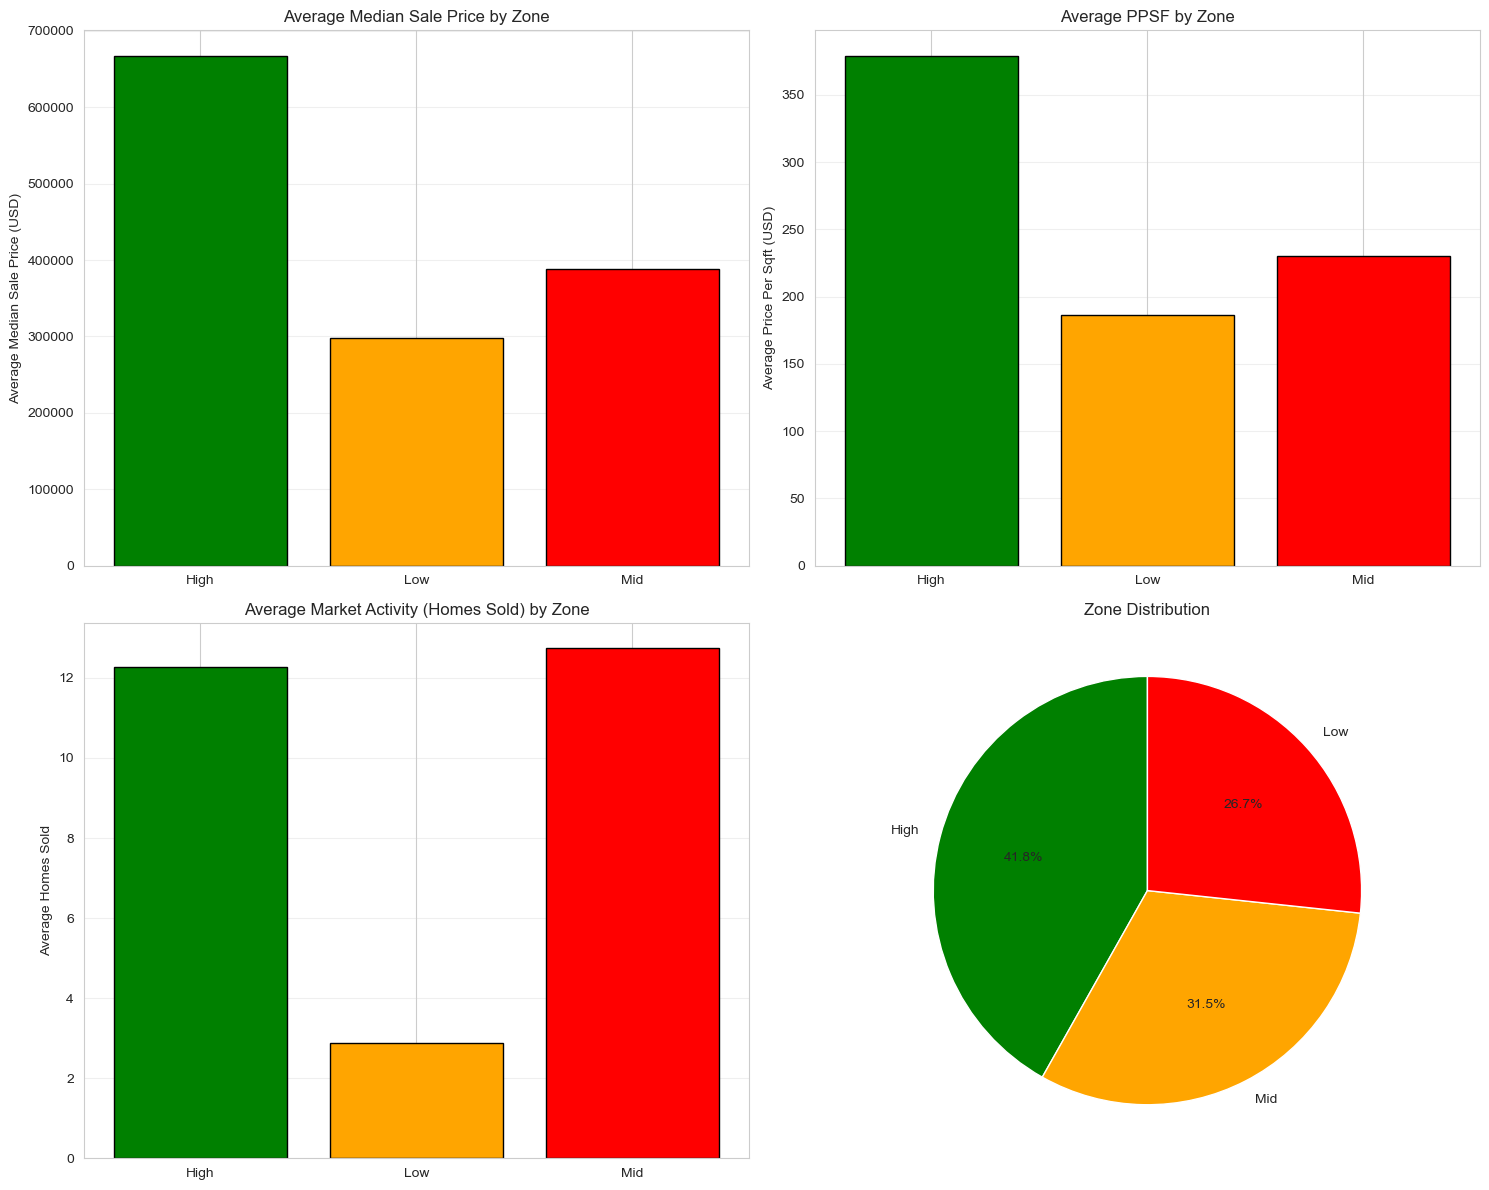

In [50]:
# Additional Analysis: Zone Statistics

print("=" * 70)
print("PRICING ZONE STATISTICS")
print("=" * 70)

zone_stats = df.groupby('predicted_zone').agg({
    'MEDIAN_SALE_PRICE': ['mean', 'median', 'std'],
    'price_per_sqft': ['mean', 'median'],
    'HOMES_SOLD': ['mean', 'median'],
    'INVENTORY': 'mean',
    'MONTHS_OF_SUPPLY': 'mean',
    'MEDIAN_DOM': 'mean'
}).round(2)

print(zone_stats)

# Visualize zone characteristics
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Average price by zone
zone_price_means = df.groupby('predicted_zone')['MEDIAN_SALE_PRICE'].mean()
axes[0, 0].bar(zone_price_means.index, zone_price_means.values, color=['green', 'orange', 'red'], edgecolor='black')
axes[0, 0].set_ylabel('Average Median Sale Price (USD)')
axes[0, 0].set_title('Average Median Sale Price by Zone')
axes[0, 0].grid(axis='y', alpha=0.3)

# Average PPSF by zone
zone_ppsf_means = df.groupby('predicted_zone')['price_per_sqft'].mean()
axes[0, 1].bar(zone_ppsf_means.index, zone_ppsf_means.values, color=['green', 'orange', 'red'], edgecolor='black')
axes[0, 1].set_ylabel('Average Price Per Sqft (USD)')
axes[0, 1].set_title('Average PPSF by Zone')
axes[0, 1].grid(axis='y', alpha=0.3)

# Average homes sold by zone
zone_homes_means = df.groupby('predicted_zone')['HOMES_SOLD'].mean()
axes[1, 0].bar(zone_homes_means.index, zone_homes_means.values, color=['green', 'orange', 'red'], edgecolor='black')
axes[1, 0].set_ylabel('Average Homes Sold')
axes[1, 0].set_title('Average Market Activity (Homes Sold) by Zone')
axes[1, 0].grid(axis='y', alpha=0.3)

# Zone distribution
zone_counts = df['predicted_zone'].value_counts()
axes[1, 1].pie(zone_counts.values, labels=zone_counts.index, autopct='%1.1f%%', 
               colors=['green', 'orange', 'red'], startangle=90)
axes[1, 1].set_title('Zone Distribution')

plt.tight_layout()
plt.show()


# Evaluation

## KNN Classifier Evaluation Metrics

For classification problems, we evaluate our KNN model using:

1. **Accuracy**: Percentage of correctly classified houses into their pricing zones
   - Shows overall performance but can be misleading with imbalanced classes

2. **F1-Score (Weighted)**: Harmonic mean of precision and recall, weighted by class frequency
   - **Why F1 matters**: Handles class imbalance fewer high-end homes
   - Shows how well the model identifies each pricing tier
   - Weighted F1 accounts for different zone sizes

3. **Per-Class F1-Score**: F1-score for each zone (Low, Mid, High) individually
   - Reveals if the model struggles with specific zones

4. **Confusion Matrix**: Shows classification errors in detail
   - Reveals which zones are confused with each other

### Why These Metrics Matter:
- **Accuracy**: Overall correctness of zone assignments
- **F1-Score**: Better metric when classes are imbalanced which zones have more/fewer houses
- **Per-Class F1**: Identifies if certain zones are harder to predict

## Regression Model Evaluation

After integrating zones into linear regression, we compare:
- **R² Score**: How much variance is explained with vs. without zone feature
- **RMSE**: Prediction error in dollars
- **MAE**: Average absolute error

The improvement in these metrics demonstrates the value of the KNN zone feature.


# Impact Section

## Social and Ethical Implications

### Positive Impacts

1. **Democratizing Real Estate Information**
   - Housing price prediction models can help first-time homebuyers, who may lack real estate expertise, make more informed decisions
   - Provides transparency in pricing, potentially reducing information asymmetry between buyers and sellers
   - Can help identify potentially undervalued properties, benefiting buyers in competitive markets

2. **Supporting Financial Planning**
   - Homebuyers can better estimate their housing budget and mortgage requirements
   - Real estate investors can use predictions to identify investment opportunities
   - Financial institutions can use models for risk assessment and property valuation

3. **Market Efficiency**
   - More accurate pricing can lead to more efficient markets with fewer overpriced or underpriced properties
   - Reduces time on market by helping sellers set realistic prices
   - Can help real estate professionals provide better service to clients

### Potential Negative Impacts and Ethical Concerns

1. **Reinforcing Existing Inequalities**
   - **Gentrification Acceleration**: Models that identify "undervalued" areas could accelerate gentrification, displacing long term residents
   - **Wealth Disparities**: Those with access to sophisticated prediction tools may gain advantages over those without, widening wealth gaps
   - **Geographic Bias**: If training data is biased toward certain neighborhoods, the model may perpetuate or amplify existing market biases

2. **Fair Housing and Discrimination**
   - **Indirect Discrimination**: Features like zipcode, while seemingly neutral, can act as proxies for protected characteristics (race, ethnicity, socioeconomic status)
   - **Redlining Concerns**: Models might inadvertently reinforce historical redlining patterns by learning from biased historical data
   - **Equal Access**: If certain groups are underrepresented in training data, predictions may be less accurate for their communities

3. **Market Manipulation Risks**
   - **Speculative Behavior**: Accurate predictions could enable speculative buying, driving up prices in certain areas
   - **Information Asymmetry**: Those with better models could exploit market inefficiencies, potentially harming less-informed participants
   - **Self Fulfilling Prophecies**: If many actors use similar models, predictions could become self reinforcing, creating bubbles

4. **Privacy and Data Concerns**
   - **Data Collection**: Models require extensive property and potentially personal data
   - **Surveillance**: Location based features raise privacy concerns about tracking and profiling
   - **Data Ownership**: Questions about who owns and controls housing market data

5. **Economic Displacement**
   - **Rent Increases**: Accurate price predictions could lead landlords to adjust rents, potentially displacing tenants
   - **Property Tax Implications**: Higher predicted values might influence property tax assessments, burdening homeowners
   - **Community Disruption**: Rapid price changes predicted by models could destabilize communities

### Mitigation Strategies

1. **Algorithmic Fairness**
   - Audit models for disparate impact across demographic groups
   - Remove or carefully handle proxy variables (like zipcode) that correlate with protected characteristics
   - Use fairness constraints in model training

2. **Transparency and Accountability**
   - Make model predictions and methodologies transparent
   - Provide explanations for predictions ( "This house is priced similarly to 5 nearby properties with...")
   - Allow for human oversight and appeals

3. **Data Diversity**
   - Ensure training data represents diverse neighborhoods and property types
   - Regularly update models to reflect changing market conditions
   - Include features that promote equity rather than reinforce disparities

4. **Regulatory Considerations**
   - Comply with fair housing laws (Fair Housing Act)
   - Consider regulations on algorithmic pricing in real estate
   - Implement safeguards against market manipulation

5. **Ethical Use Guidelines**
   - Use models to inform, not replace, human judgment
   - Consider social impact when deploying models
   - Engage with affected communities when developing and deploying models

### Critical Reflection

 Well intentioned housing price prediction models can have unintended negative consequences. The goal should not be to create the most accurate model possible, but rather to develop models that are:
- **Fair**: Don't perpetuate or amplify existing inequalities
- **Transparent**: Users understand how predictions are made
- **Beneficial**: Improve outcomes for all stakeholders, not just some
- **Accountable**: Include mechanisms for oversight and correction

As data scientists, we have a responsibility to consider these impacts and work toward models that serve the broader public good, not just maximize predictive accuracy. This requires ongoing critical thinking, ethical reflection, and engagement with the communities affected by our models.


# GitHub Repository and Code

## Repository Information

**GitHub Repository**: https://github.com/JadonVC/Data-Analysis-Final-Project.git

**Dataset**: 
- File: `city_market_tracker.tsv000`
- Source: City Market Tracker Dataset
- Description: Aggregated housing market data with 6+ million records across US cities
- Contains: Median sale prices, market metrics, inventory, and regional data

## Code Structure

This notebook contains:
1. **Data Loading and Exploration**: Understanding the city level market dataset structure and characteristics
2. **Price Per Square Foot**: Using MEDIAN_PPSF from the dataset
3. **Zone Creation**: Dividing cities into Low/Mid/High pricing tiers based on PPSF
4. **KNN Classification**: Training classifier to predict pricing zones using state and market features
5. **Zone Visualization**: State level analysis showing zone clustering
6. **Regression Integration**: Using zones as features to improve linear regression for median sale price prediction
7. **Evaluation**: Classification metrics (Accuracy, F1) and regression comparison
8. **Documentation**: Complete sections covering introduction, methods, evaluation, conclusions, and impact

## Dependencies

Required Python packages:
- pandas
- numpy
- matplotlib
- seaborn
- scikit-learn

Install with: `pip install pandas numpy matplotlib seaborn scikit-learn`
